<a href="https://colab.research.google.com/github/kunal611/Aerofit_Business_Case-/blob/main/Aerofit_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Aerofit - Descriptive statistics and Probability**

# **About : AEROFIT**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# **Problem Statement:**
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

# **Objective:**
Create a descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business

## **Importing of important libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

## **Downloading the Aerofit Data**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2023-07-25 11:59:54--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.181, 13.224.9.129, 13.224.9.24, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-07-25 11:59:54 (97.6 MB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]



## **Reading the dataset**

In [ ]:
df=pd.read_csv("aerofit_treadmill.csv?1639992749")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## **Analysing the basic metrics**

In [ ]:
df.shape

(180, 9)

In [ ]:
df.size

1620

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# **Dataset Characteristics: Customers trait analysis with the products**

*  Product Purchased: KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers
* Age : In years, age of the customer who purchased
* Gender: Gender of the purchased customer
* Education: represented in years
* Marital Status: Single or partnered
* Usage: The average number of times the customer has planned to use the treadmill each week
* Fitness: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)
* Miles: The average number of miles the customer expects to walk or run each week
* Income: Annual income of the user in Dollars $


## **MISSING VALUE DETECTION**

In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


## **Descriptive Analysis**

 - Total count of all columns is 180
 - Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.
 - Education: Mean Education is 15 with maximum as 21 and minimum as 12.
 - Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
 - Fitness: Average rating is 3.3 on a scale of 1 to 5.
 - Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
 - Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K

# **Value Counts and unique attributes**

In [ ]:
df.describe()[["Age","Education","Usage","Income","Miles"]].loc[["min","max"]]

,Age,Education,Usage,Income,Miles
min,18.0,12.0,2.0,29562.0,21.0
max,50.0,21.0,7.0,104581.0,360.0




### **Customers distribution over the distinct product --> 80 KP281, 60 KP481, 40 KP781**



In [ ]:
Product_count=df["Product"].value_counts().reset_index()
Product_count.columns=["product_name","Count"]
Product_count

,product_name,Count
0,KP281,80
1,KP481,60
2,KP781,40


### **Among customers, there are 104 males and 76 females**

In [ ]:
gender_count=df["Gender"].value_counts().reset_index()
gender_count.columns=["Gender","Count"]
gender_count

,Gender,Count
0,Male,104
1,Female,76


### **We have maximum customers falling in the category of 16,14 and 18 years of education which counts of 85, 55 and 23 respectively.**

In [ ]:
Education_count=df["Education"].value_counts().reset_index()
Education_count.columns=["Education","Count"]
Education_count

,Education,Count
0,16,85
1,14,55
2,18,23
3,15,5
4,13,5
5,12,3
6,21,3
7,20,1


### **Most customers prefer using the machines 3 or 4 times in a  week.**  

In [ ]:
Usage_count=df["Usage"].value_counts().reset_index()
Usage_count.columns=["Usage","Count"]
Usage_count

,Usage,Count
0,3,69
1,4,52
2,2,33
3,5,17
4,6,7
5,7,2


## **Among customers the marital status distribution we have 107 Partnered individuals and 73 single individuals.**

In [ ]:
marital_status_count = df['MaritalStatus'].value_counts().reset_index()
marital_status_count.columns = ['MaritalStatus', 'Count']
marital_status_count

,MaritalStatus,Count
0,Partnered,107
1,Single,73


## **Creation of new column "Fitness_Shapes" from "Fitness" column**
##categorizing
### 1-- Poor Shape
### 2-- Bad Shape
### 3-- Average Shape
### 4-- Good Shape
### 5-- Excellent Shape

In [ ]:
fitness_count=df["Fitness"].value_counts().reset_index()
fitness_count.columns=["Fitness","Count"]
fitness_count

,Fitness,Count
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


In [ ]:
temp_points=[0,1,2,3,4,5]
temp_labels=["Poor Shape","Bad Shape","Average shape","Good shape","Excellent Shape"]
df["Fitness_Shapes"]=pd.cut(df["Fitness"],bins=temp_points,labels=temp_labels)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Shapes
0,KP281,18,Male,14,Single,3,4,29562,112,Good shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape
176,KP781,42,Male,18,Single,5,4,89641,200,Good shape
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent Shape


### **Fitness shape categorized as "Average"(rated 3) being the most prominent with 97 customers.**

In [ ]:
fitness_shapes_count=df["Fitness_Shapes"].value_counts().reset_index()
fitness_shapes_count.columns=["Fitness_Shapes","Count"]
fitness_shapes_count

,Fitness_Shapes,Count
0,Average shape,97
1,Excellent Shape,31
2,Bad Shape,26
3,Good shape,24
4,Poor Shape,2


## **Creation of new column "Age_band" from "Age" column**
##categorizing
### 0-21 Teen
### 22-35 Adult
### 36-45-- Middle aged
### 45-60-- Elder

In [ ]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
temp_points=[0,21,35,45,60]
temp_labels=['Teen','Adult','Middle Aged','Elder']
df["Age_band"]=pd.cut(df["Age"],bins=temp_points,labels=temp_labels)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Shapes,Age_band
0,KP281,18,Male,14,Single,3,4,29562,112,Good shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape,Middle Aged
176,KP781,42,Male,18,Single,5,4,89641,200,Good shape,Middle Aged
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape,Middle Aged
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent Shape,Elder


## **We have most customers in the age group of adult catgory which represents the age band from 22-35 with 135 counts**

In [ ]:
Age_band_count=df["Age_band"].value_counts().reset_index()
Age_band_count.columns=["Age_band","Count"]
Age_band_count

,Age_band,Count
0,Adult,135
1,Middle Aged,22
2,Teen,17
3,Elder,6


## **Creation of new column "Income_band" from "Income" column**
##**categorizing**
### 28k-47k : Low
### 48k-66k : Medium
### 67k-85k : High
### 86k-105k : Very high

In [ ]:
# list of unique income
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
temp_points=[28000,47000,66000,85000,105000]
temp_labels=["Low","Medium","High","Very high"]
df["Income_band"]=pd.cut(df["Income"],bins=temp_points,labels=temp_labels)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Shapes,Age_band,Income_band
0,KP281,18,Male,14,Single,3,4,29562,112,Good shape,Teen,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Average shape,Teen,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average shape,Teen,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Average shape,Teen,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape,Middle Aged,High
176,KP781,42,Male,18,Single,5,4,89641,200,Good shape,Middle Aged,Very high
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape,Middle Aged,Very high
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent Shape,Elder,Very high


## **Income band of Medium(48k-66k) and Low(28k to 47k) captures maximum customers with 82 and 71 customer counts.**

In [ ]:
Income_band_count=df["Income_band"].value_counts().reset_index()
Income_band_count.columns=["Income_band","Count"]
Income_band_count

,Income_band,Count
0,Medium,82
1,Low,71
2,Very high,17
3,High,10


## **Creation of new column "Miles_band" from "Miles" column**
##**categorizing**
### 20-85 : Low
### 86-190 : Medium
### 191-275 : High
### 276-360 : Very high

In [ ]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [ ]:
temp_points=[20,85,190,275,360]
temp_labels=["Low","Medium","High","Very high"]
df["Miles_band"]=pd.cut(df["Miles"],bins=temp_points,labels=temp_labels)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Shapes,Age_band,Income_band,Miles_band
0,KP281,18,Male,14,Single,3,4,29562,112,Good shape,Teen,Low,Medium
1,KP281,19,Male,15,Single,2,3,31836,75,Average shape,Teen,Low,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average shape,Teen,Low,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Average shape,Teen,Low,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape,Middle Aged,High,High
176,KP781,42,Male,18,Single,5,4,89641,200,Good shape,Middle Aged,Very high,High
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape,Middle Aged,Very high,Medium
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent Shape,Elder,Very high,Medium


## **We have most customers falling in the category of low and medium miles with 87 and 81 counts repectively.**

In [ ]:
Miles_band_count=df["Miles_band"].value_counts().reset_index()
Miles_band_count.columns=["Miles_band","Count"]
Miles_band_count

,Miles_band,Count
0,Low,87
1,Medium,81
2,High,9
3,Very high,3




## **Insights**
 - KP281, KP481, KP781 are the 3 different products
 - Most commonly purchased treadmill product type is KP281
 - There are 32 unique ages
 - 104 Males and 76 Females are in the customers list
 - 8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
 - Highest rated Fitness rating is 3
 - Most customers usage treadmill atleast 3 days per week
 - Majority of the customers who have purchased are Married/Partnered

## **Creation of catergorical data from discrete variables**
 - Income into Income_band
 - Fitness into Fitness_Shapes
 - Miles into Miles_band
 - Age into Age_band

## **Univariate Analysis**


*   **Product Distribution**
*   **Marital Status Distribution**
*   **Gender Distribution**
*   **Fitness Distribution**




### **Product Distribution --> 44% for KP281, 33% for KP481, 22% for KP781**

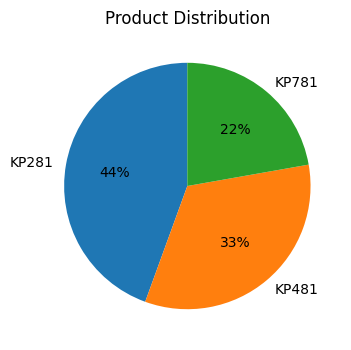

In [ ]:
plt.figure(figsize=(6,4))
my_data=list(Product_count["Count"])
my_labels=list(Product_count["product_name"])
plt.pie(my_data, labels=my_labels, autopct='%.0f%%', startangle=90)
plt.title("Product Distribution")
plt.show()


### **Gender Distribution --> 58% Males and 42% Females**

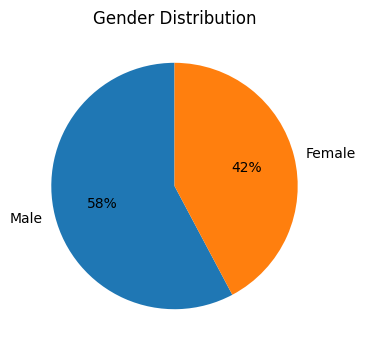

In [ ]:
plt.figure(figsize=(6,4))
my_data=list(gender_count["Count"])
my_labels=list(gender_count["Gender"])
plt.pie(my_data, labels=my_labels, autopct='%.0f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

### **Marital Status Distribution --> 59% Partnered and 41% Single**

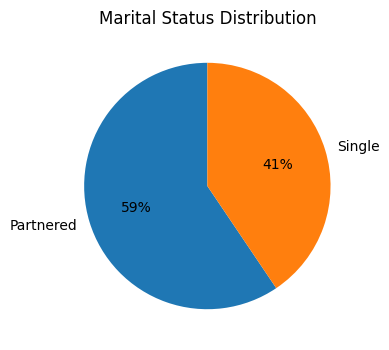

In [ ]:
plt.figure(figsize=(6,4))
my_data=list(marital_status_count["Count"])
my_labels=list(marital_status_count["MaritalStatus"])
plt.pie(my_data, labels=my_labels, autopct='%.0f%%', startangle=90)
plt.title("Marital Status Distribution")
plt.show()

## **We have customers from fitnes rating 3 which represents maximum individuals have average shape with 54% dominance in the distribution.**

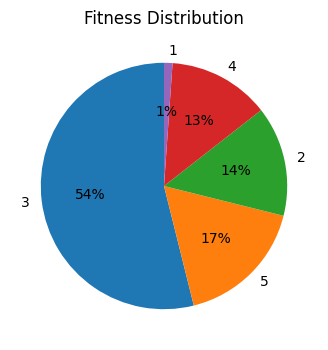

In [ ]:
plt.figure(figsize=(6,4))
my_data=list(fitness_count["Count"])
my_labels=list(fitness_count["Fitness"])
plt.pie(my_data, labels=my_labels, autopct='%.0f%%', startangle=90)
plt.title("Fitness Distribution")
plt.show()

## **Below plot shares the info regarding the customer distribution in the different range of income levels.**

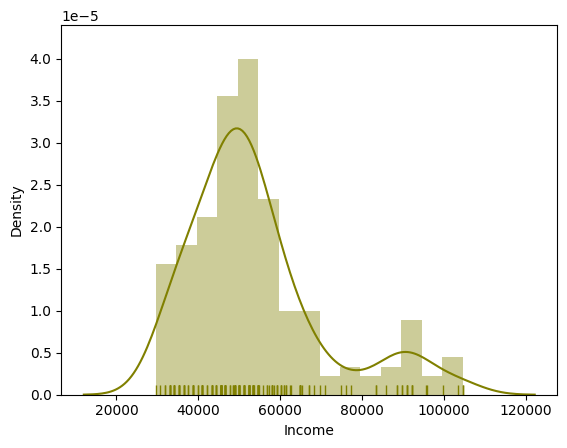

In [ ]:
sns.distplot(df.Income,hist=True,rug=True,color="olive")
plt.show()

## **Below plot shares the info regarding the customer distribution in the different age bins.**

 - Most of the customers (more than 80% of the total) are aged between 20 and 30 years.
 - Less than 10% customers are aged 40 years and above



[]

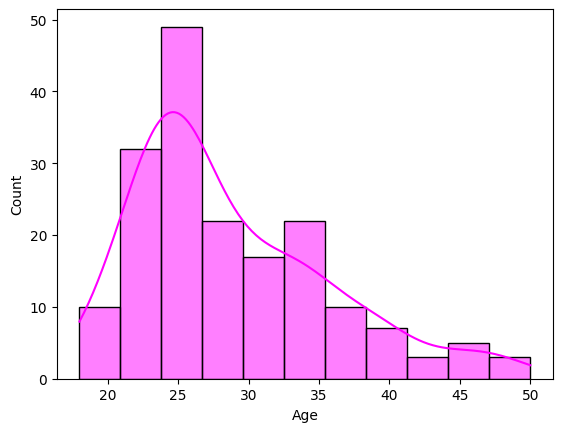

In [ ]:
plt.figure()
sns.histplot(data = df, x = 'Age', kde = True, color = 'magenta')
plt.plot()

## **Histogram representing the customers distribution among different income bins.**
 - Majority of the customers earn in between 35000 and 60000 dollars annually.
 - 80 % of the customers annual salary is less than 65000$.

[]

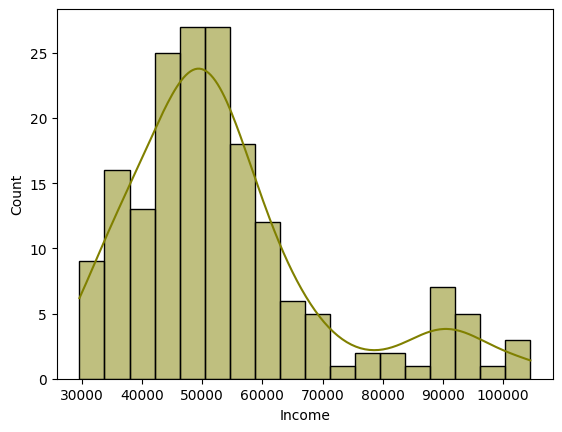

In [ ]:
plt.figure()
sns.histplot(data = df, x = 'Income', kde = True, bins = 18, color = 'olive')
plt.plot()

## **Histogram representing different years of education which peaks between 15-16 years as the most acquired among customers.**
 - It can be evidently observed in the above plot that most customers have 16 years of Education, followed by 14 years and 18 years

[]

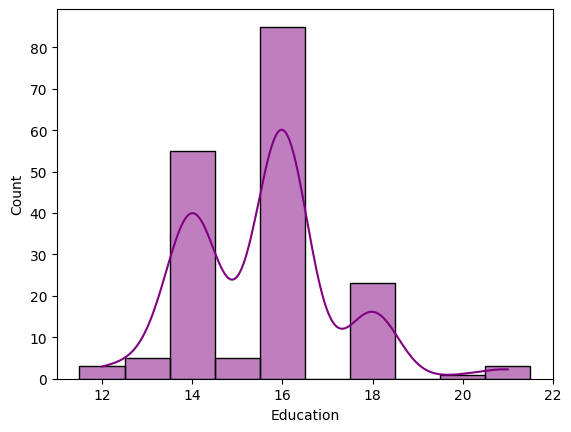

In [ ]:
sns.histplot(data = df, x = 'Education', discrete = True, kde = True, color = 'purple')
plt.plot()

## **Histogram distribution representing the average times usage on weekly basis which shows 3 times as the most consistent among customers.**

- Based on the below plot, it appears that most customers use treadmills on alternate days.
- There are about 40% of customers who use treadmills three days a week and about 30% who use them four days a week.

[]

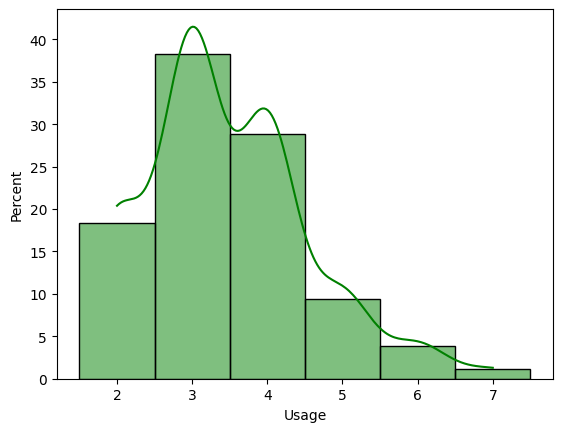

In [ ]:
sns.histplot(data = df, x = 'Usage', kde = True, stat = 'percent', discrete = True, color = 'green')
plt.plot()

## **Below mentioned histogram depicts that majority of customers are in average shape with fitness rating 3.**

 - More than 50% customers rate themselves 3 out of 5 in self rated fitness scale
 - Around 30% of the total customers rate themselves 4 or above in the fitness scale.
 - Around 70 % of the aerofit customers rate themselves 3 or less than 3 in fitness scale.
 - Less than 20 % of aerofit customers have excellent shape.

[]

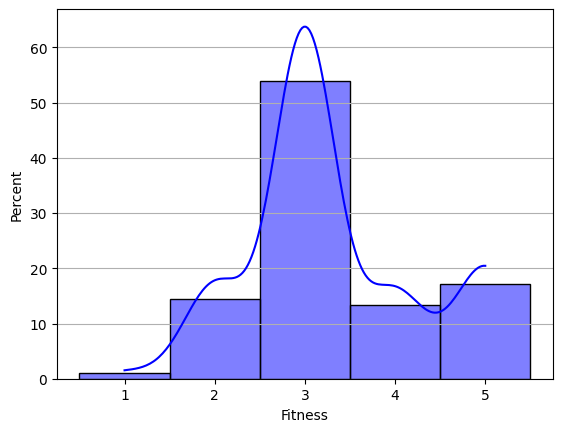

In [ ]:
plt.figure()
sns.histplot(data = df, x = 'Fitness', discrete = True, kde = True, stat = 'percent', color = 'blue')
plt.yticks(np.arange(0, 101, 10))
plt.grid(axis = 'y')
plt.plot()

## **Correlation/ heatmap between different continuous variables present in the dataset.**
* The customer with high fitness scale is more likely to run or walk more miles.
* The customer who expects to use the treadmill more times in a week generally expects to walk or run more miles in the week.
* The customer who have a high fitness scale generally uses the treadmill more frequently in a week.

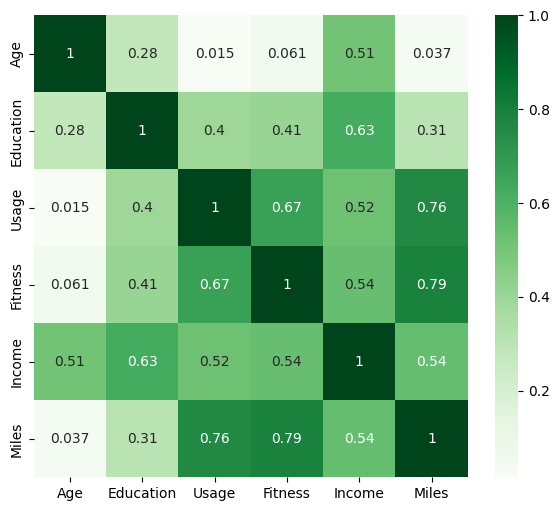

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), cmap="Greens", annot=True)
plt.show()

## **Below is the pairplot showing the relationship of product with other different continuous variables present in the dataset.It helps in summarising a large amount of data in a single figure.**

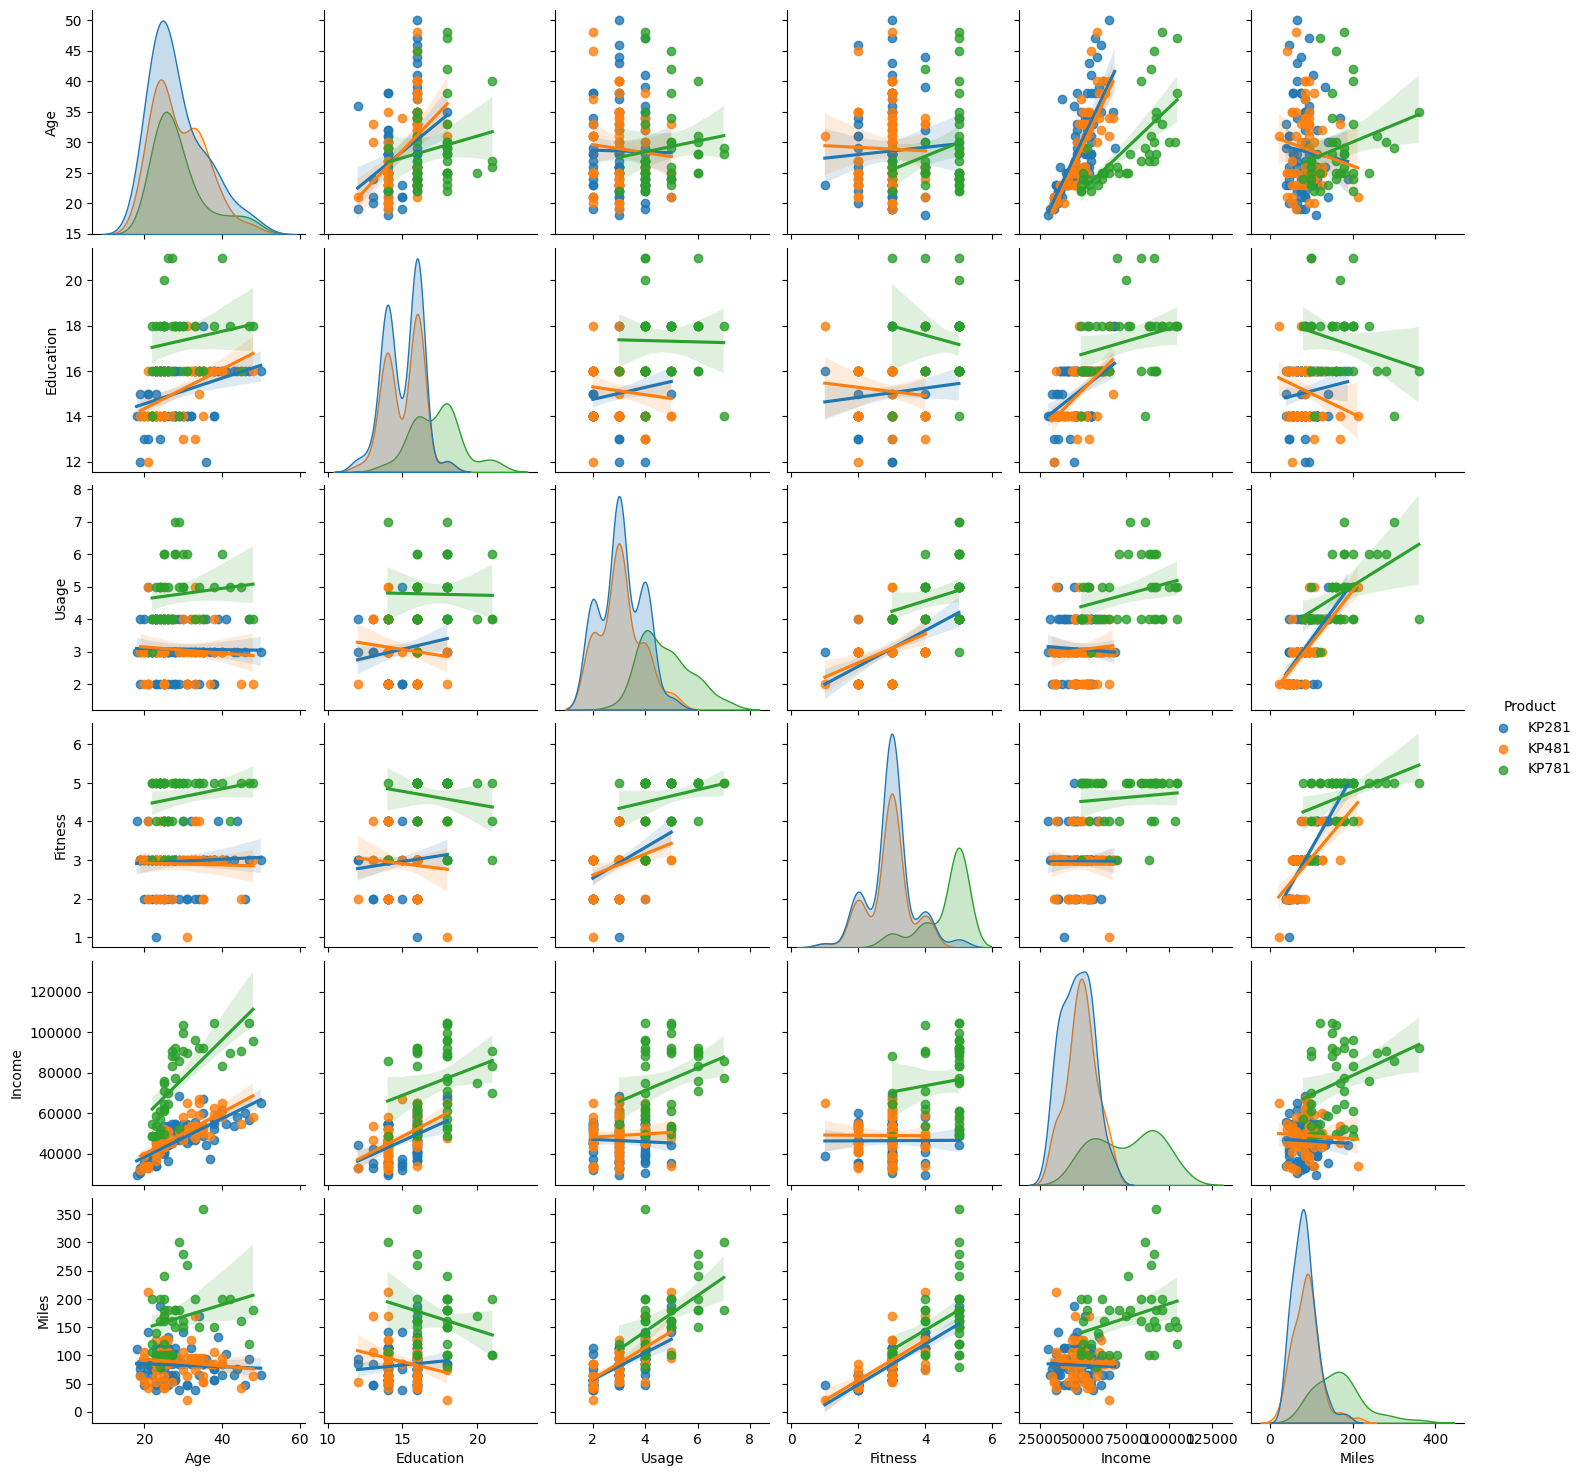

In [ ]:
sns.pairplot(df, hue ='Product', kind="reg")
plt.show()

## **Similar to above, this pairplot is showing the relationship of marital status with other different continuous variables present in the dataset.It helps in summarising a large amount of data in a single figure.**

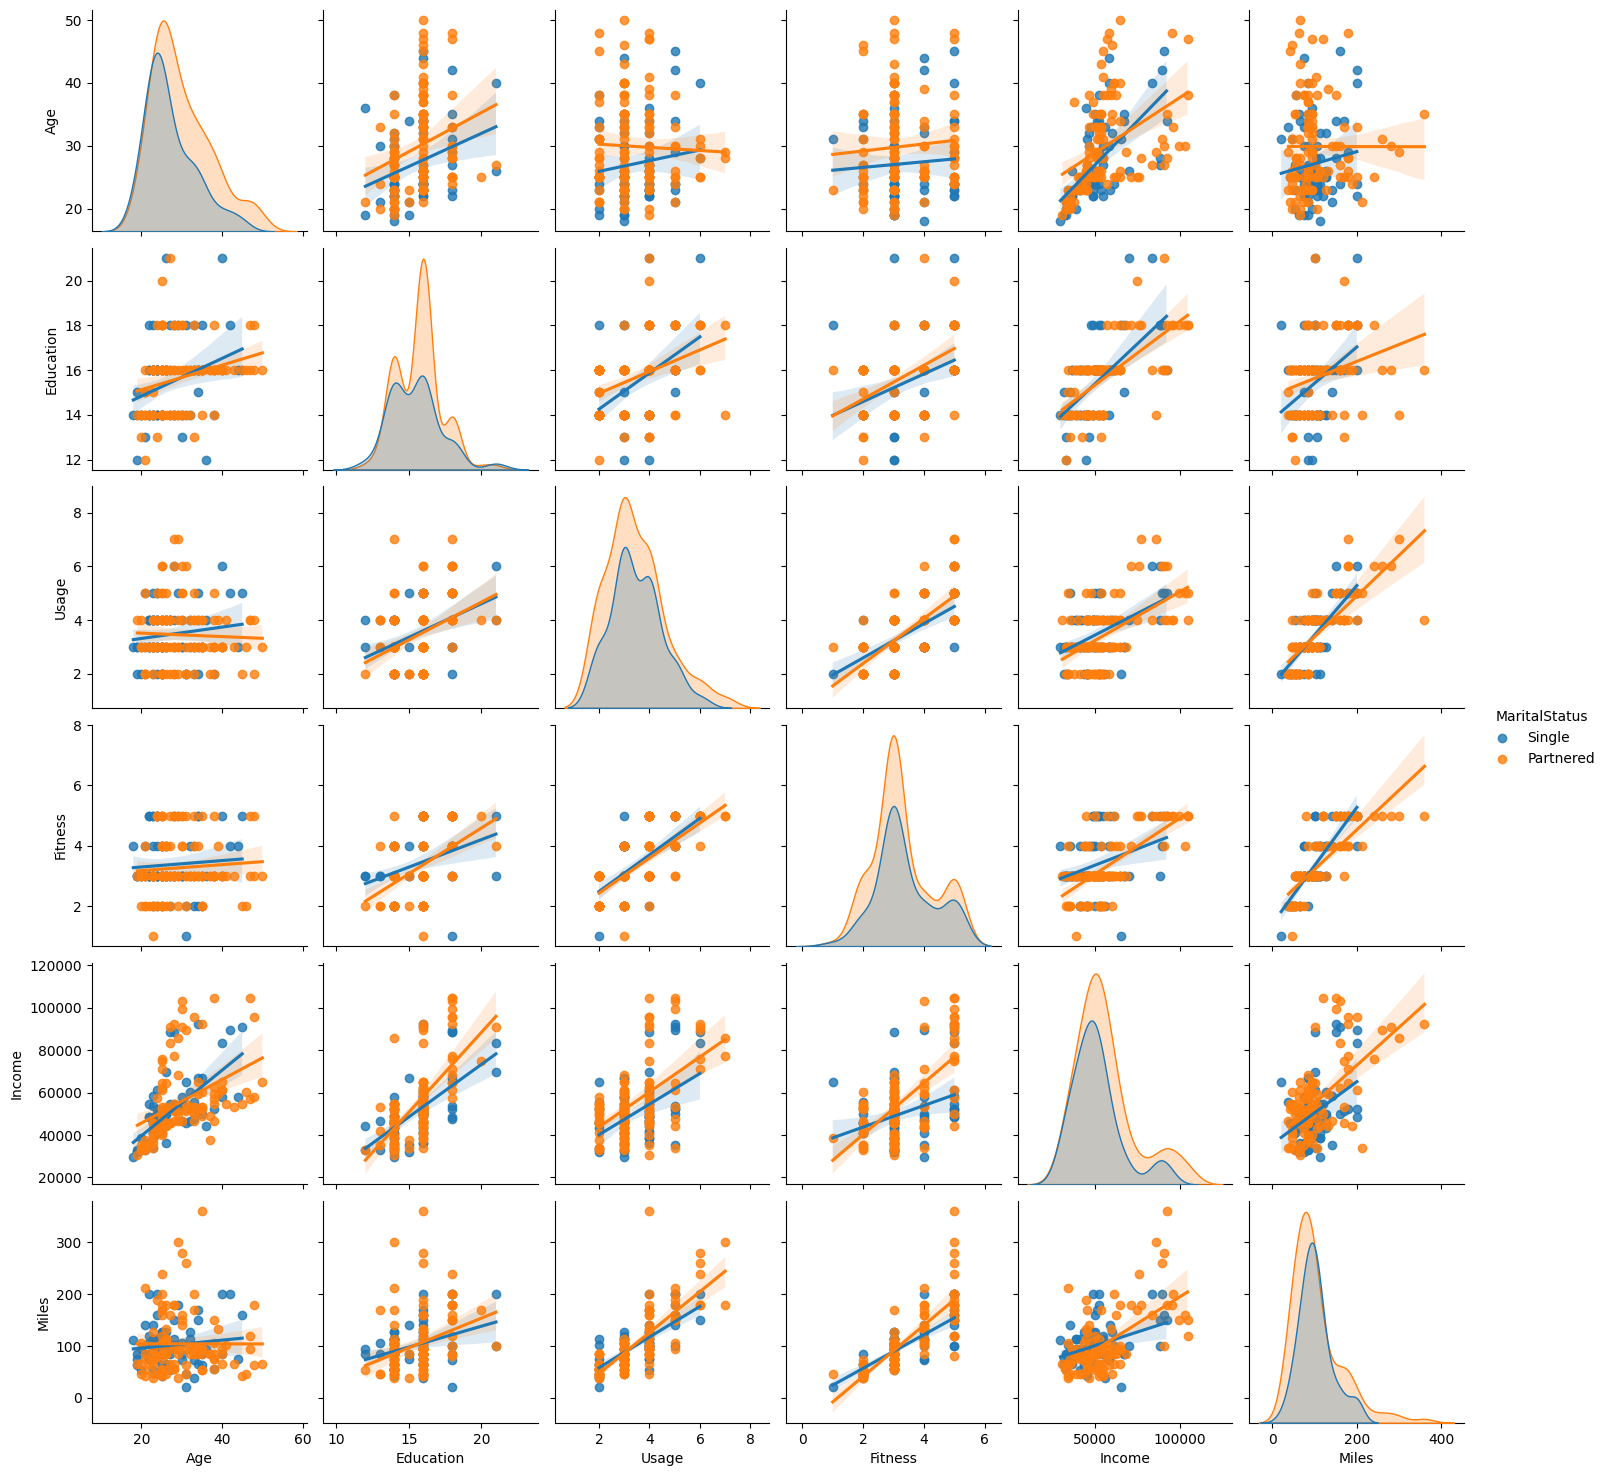

In [ ]:
sns.pairplot(df,hue='MaritalStatus',kind='reg')
plt.show()

## **Boxplot representation of age with product and distinguised between genders also depicts the outliers present in a particular product which in this case is KP281 for female and KP781 for Males.**

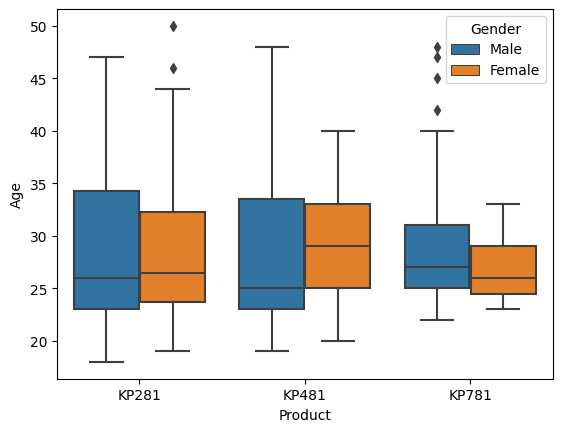

Mean :  28.79
Median :  26.0
Diff b/w mean and median: 2.79
1st Quartile :  24.0
3rd Quartile :  33.0
Innerquartile Range :  9.0
Upper Bound :  46.5
Lower Bound :  10.5
Outliers :  [47, 47, 48, 48, 50]
No of Outliers :  5
Mean :  28.45
Median :  26.5
Diff b/w mean and median: 1.95
Quartile 1 :  23.75
Quartile 3 :  32.25
Inner Quartile Range :  8.5
Upper :  45.0
Lower :  11.0
Outliers :  [46, 50]
No of Outliers :  2
Mean :  29.55
Median :  27.0
Diff b/w mean and median: 2.55
Quartile 1 :  25.0
Quartile 3 :  31.0
Inner Quartile Range :  6.0
Upper :  40.0
Lower :  16.0
Outliers :  [42, 45, 47, 48]
No of Outliers :  4


In [ ]:
sns.boxplot(x='Product',hue="Gender", y="Age", data=df)
plt.show()

data = df['Age']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP281') & (df['Gender'] == 'Female'), 'Age']
print('Mean : ', data.mean())
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP781') & (df['Gender'] == 'Male'), 'Age']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

## **Boxplot representation of income with product and distinguised between genders also depicts the outliers present in a particular product which in this case is KP481 for female.**

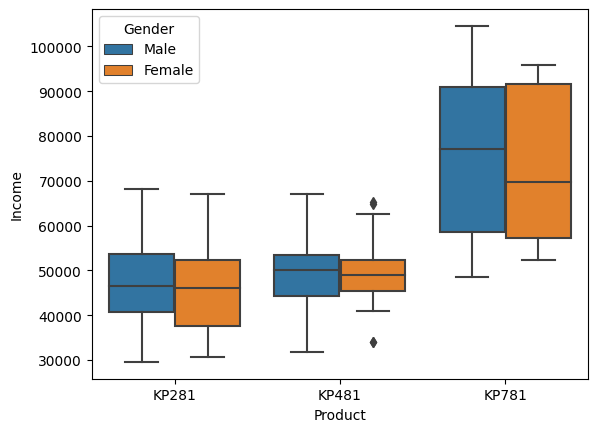

Mean :  53719.58
Median :  50596.5
Diff b/w mean and median: 3123.08
1st Quartile :  44058.75
3rd Quartile :  58668.0
Innerquartile Range :  14609.25
Upper Bound :  80581.875
Lower Bound :  22144.875
Outliers :  [83416, 83416, 85906, 88396, 88396, 89641, 89641, 90886, 90886, 90886, 92131, 92131, 92131, 95508, 95866, 99601, 103336, 104581, 104581]
No of Outliers :  19
Mean :  49336.45
Median :  48891.0
Diff b/w mean and median: 445.45
Quartile 1 :  45480.0
Quartile 3 :  52302.0
Inner Quartile Range :  6822.0
Upper :  62535.0
Lower :  35247.0
Outliers :  [34110, 34110, 65220, 64809]
No of Outliers :  4


In [ ]:
sns.boxplot(x='Product',hue="Gender", y="Income", data=df)
plt.show()

data = df['Income']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP481') & (df['Gender'] == 'Female'), 'Income']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

## **Boxplot representation of Miles with product and distinguised between genders also depicts the outliers present in all the products which in this case are KP281 for both male and female, KP481 for female and KP781 for male.**

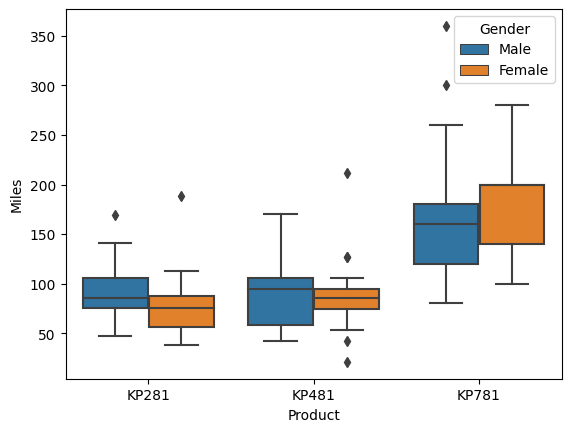

Mean :  103.19
Median :  94.0
Diff b/w mean and median: 9.19
1st Quartile :  66.0
3rd Quartile :  114.75
Innerquartile Range :  48.75
Upper Bound :  187.875
Lower Bound :  -7.125
Outliers :  [188, 200, 200, 200, 200, 200, 200, 212, 240, 260, 280, 300, 360]
No of Outliers :  13
Mean :  89.38
Median :  85.0
Diff b/w mean and median: 4.38
Quartile 1 :  75.0
Quartile 3 :  105.25
Inner Quartile Range :  30.25
Upper :  150.625
Lower :  29.625
Outliers :  [169]
No of Outliers :  1
Mean :  76.2
Median :  75.0
Diff b/w mean and median: 1.2
Quartile 1 :  56.0
Quartile 3 :  87.25
Inner Quartile Range :  31.25
Upper :  134.125
Lower :  9.125
Outliers :  [188]
No of Outliers :  1
Mean :  87.34
Median :  85.0
Diff b/w mean and median: 2.34
Quartile 1 :  74.0
Quartile 3 :  95.0
Inner Quartile Range :  21.0
Upper :  126.5
Lower :  42.5
Outliers :  [212, 127, 42, 127, 21]
No of Outliers :  5
Mean :  164.12
Median :  160.0
Diff b/w mean and median: 4.12
Quartile 1 :  120.0
Quartile 3 :  180.0
Inner Quar

In [ ]:
sns.boxplot(x='Product',hue="Gender", y="Miles", data=df)
plt.show()
data = df['Miles']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP281') & (df['Gender'] == 'Male'), 'Miles']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP281') & (df['Gender'] == 'Female'), 'Miles']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP481') & (df['Gender'] == 'Female'), 'Miles']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP781') & (df['Gender'] == 'Male'), 'Miles']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

## **Boxplot representation of usage with product and distinguised between genders also depicts the outliers present in a particular product which in this case is KP281 for female and KP481 and Kp781 for males.**

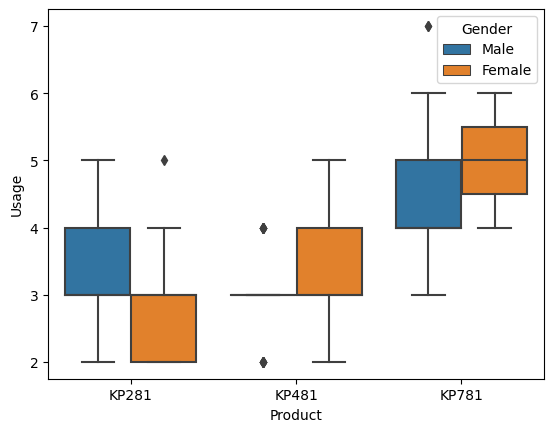

Mean :  3.46
Median :  3.0
Diff b/w mean and median: 0.46
1st Quartile :  3.0
3rd Quartile :  4.0
Innerquartile Range :  1.0
Upper Bound :  5.5
Lower Bound :  1.5
Outliers :  [6, 6, 6, 6, 6, 6, 6, 7, 7]
No of Outliers :  9
Mean :  2.9
Median :  3.0
Diff b/w mean and median: -0.1
Quartile 1 :  2.0
Quartile 3 :  3.0
Inner Quartile Range :  1.0
Upper :  4.5
Lower :  0.5
Outliers :  [5]
No of Outliers :  1
Mean :  3.0
Median :  3.0
Diff b/w mean and median: 0.0
Quartile 1 :  3.0
Quartile 3 :  3.0
Inner Quartile Range :  0.0
Upper :  3.0
Lower :  3.0
Outliers :  [2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2]
No of Outliers :  14
Mean :  4.73
Median :  4.0
Diff b/w mean and median: 0.73
Quartile 1 :  4.0
Quartile 3 :  5.0
Inner Quartile Range :  1.0
Upper :  6.5
Lower :  2.5
Outliers :  [7, 7]
No of Outliers :  2


In [ ]:
sns.boxplot(x='Product',hue="Gender", y="Usage", data=df)
plt.show()
data = df['Usage']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP281') & (df['Gender'] == 'Female'), 'Usage']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP481') & (df['Gender'] == 'Male'), 'Usage']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP781') & (df['Gender'] == 'Male'), 'Usage']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

## **Boxplot representation of education with product and distinguised between genders also depicts the outliers present in a particular product which in this case is KP781 for female.**

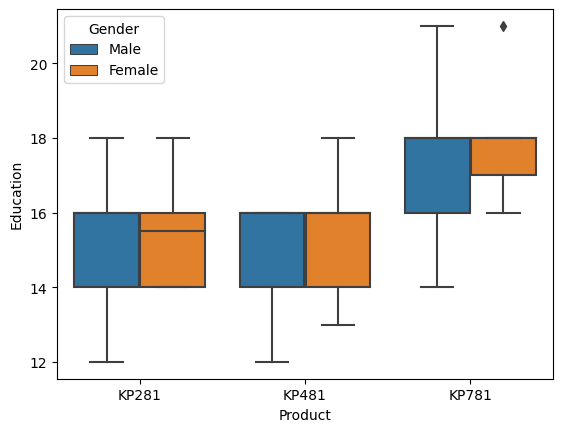

Mean :  15.57
Median :  16.0
Diff b/w mean and median: -0.43
1st Quartile :  14.0
3rd Quartile :  16.0
Innerquartile Range :  2.0
Upper Bound :  19.0
Lower Bound :  11.0
Outliers :  [20, 21, 21, 21]
No of Outliers :  4
Mean :  17.86
Median :  18.0
Diff b/w mean and median: -0.14
Quartile 1 :  17.0
Quartile 3 :  18.0
Inner Quartile Range :  1.0
Upper :  19.5
Lower :  15.5
Outliers :  [21]
No of Outliers :  1


In [ ]:
sns.boxplot(x='Product',hue="Gender", y="Education", data=df)
plt.show()
data = df['Education']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

data = df.loc[(df['Product'] == 'KP781') & (df['Gender'] == 'Female'), 'Education']
print('Mean : ', data.mean().round(2))
print('Median : ', data.median())
print("Diff b/w mean and median:", (data.mean()-data.median()).round(2))
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)
print("="*50)

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Gender with Product**



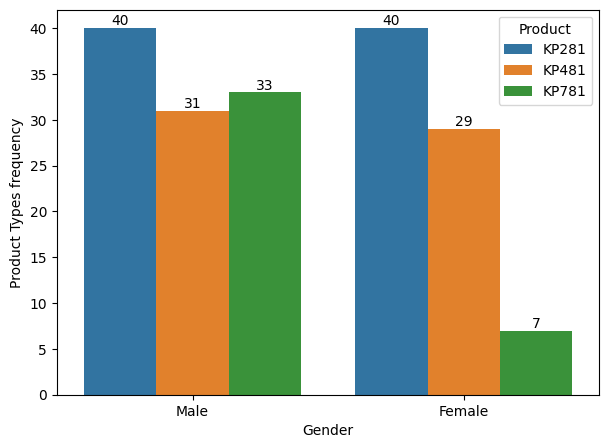

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='Gender',hue='Product',data=df)
plt.ylabel('Product Types frequency')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Usage with Product**




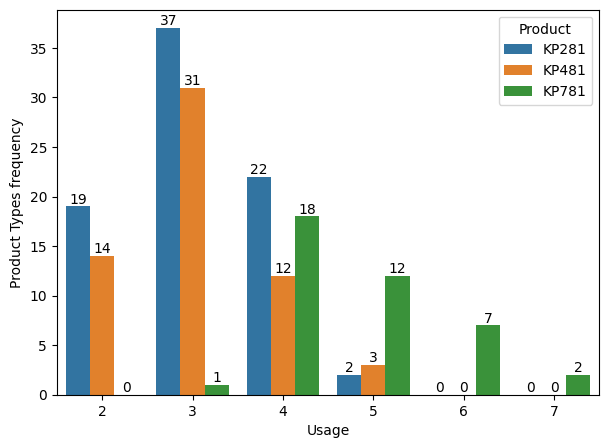

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='Usage',hue='Product',data=df)
plt.ylabel('Product Types frequency')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Marital Status with Product**


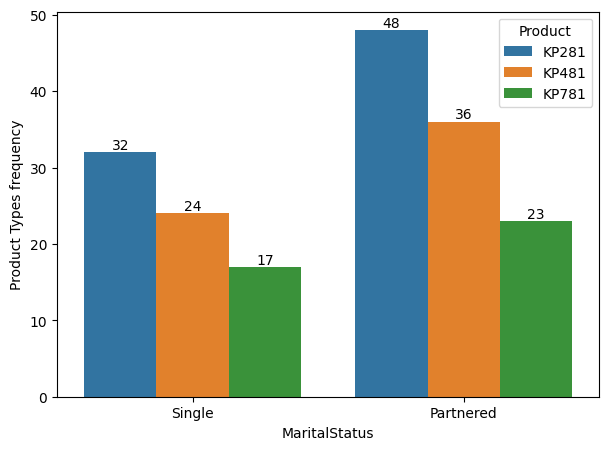

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='MaritalStatus',hue='Product',data=df)
plt.ylabel('Product Types frequency')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Education with Product**
 - Most customers who come in the range of 14 to 16 years of education.
 - Most customers who purchased KP781 falls in the range of 16 or above in matter of years of education.

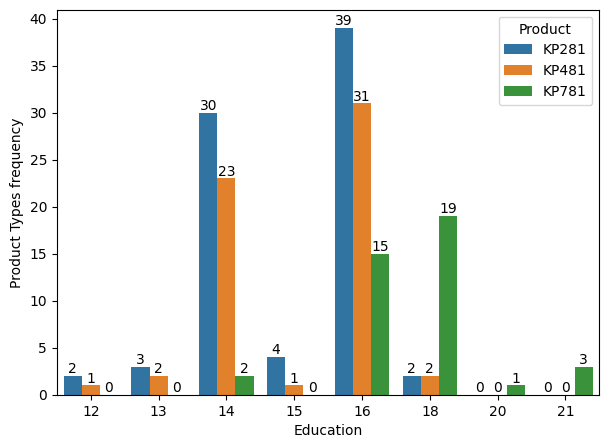

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='Education',hue='Product',data=df)
plt.ylabel('Product Types frequency')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Marital status  with Gender**
 - Partnered customers are the most buyers of aerofit product
 - Out of both Single and Partnered customers, Male customers are significantly high
 - Female customers are considerably low compared to Male customers

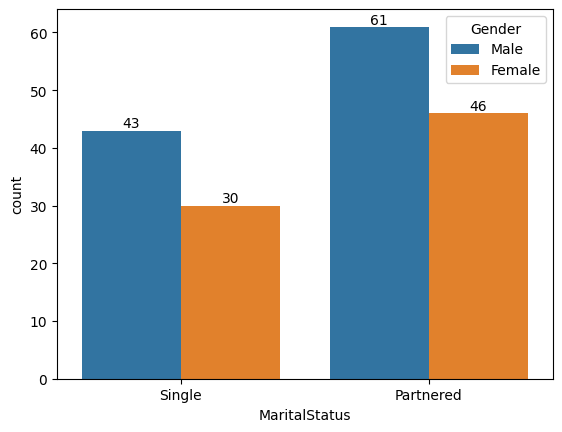

In [ ]:
# Count among Gender and their Marital Status
ax=sns.countplot(data=df,x='MaritalStatus',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Usage with Gender**
 - Among Male and Female genders, Male's usage is 4 days per week
 - Female customers mostly use 3 days per week
 - Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

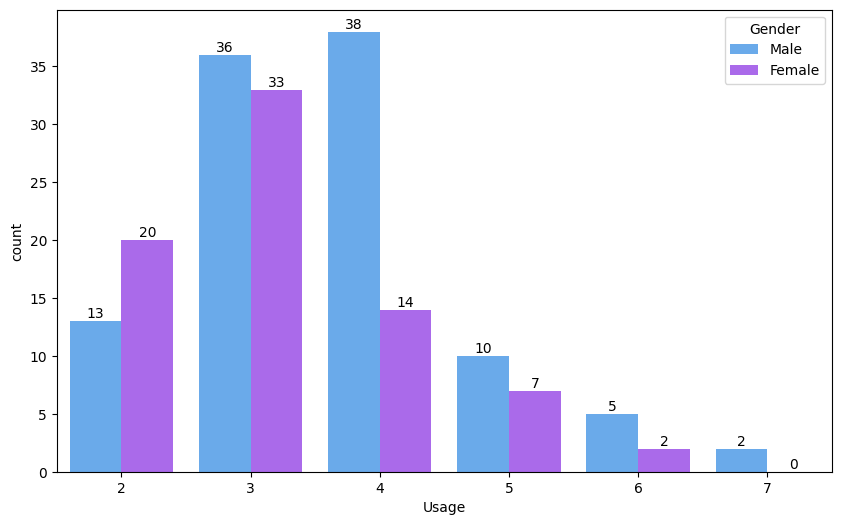

In [ ]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x='Usage',hue='Gender',palette='cool')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Fitness with Gender**
 - Among the fitness rating both Male and Female most have rated as average
 - Significant number of Male customers are at Excellent shape compared to Female customers

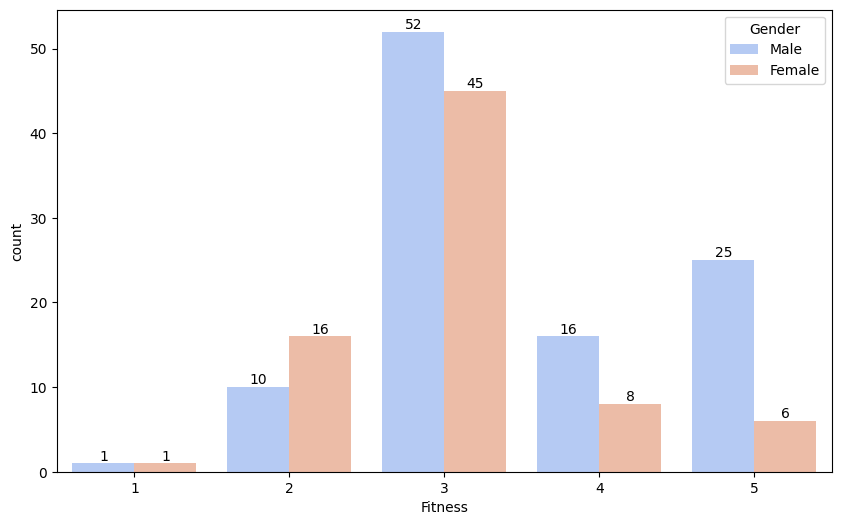

In [ ]:
# Fitness rating among the customers categorised by Gender
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x='Fitness',hue='Gender',palette='coolwarm')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Gender with Income**
 - We can conclude the spike from 40K to around 80K is the most common income per annum of the customers

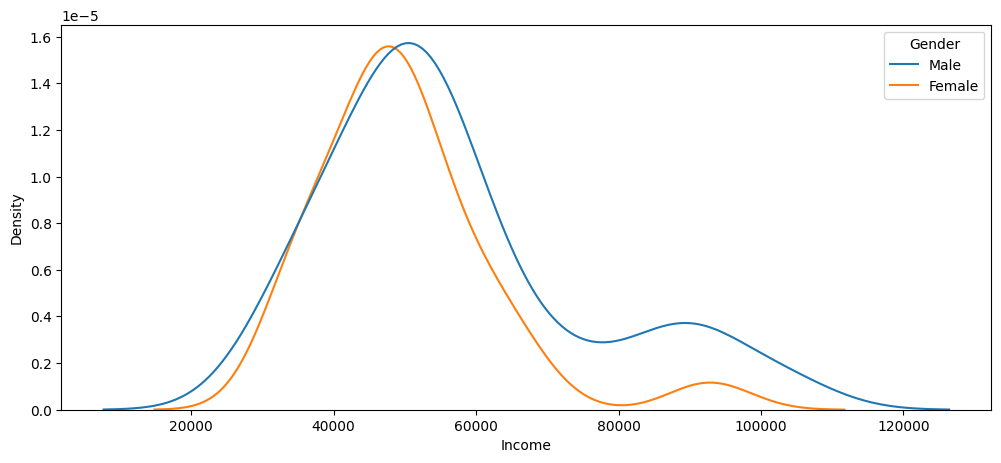

In [ ]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Gender with Usage**
 - Male customers usage is significantly higher the female customer
 - Female customer's lack consistency after the 3 days per week

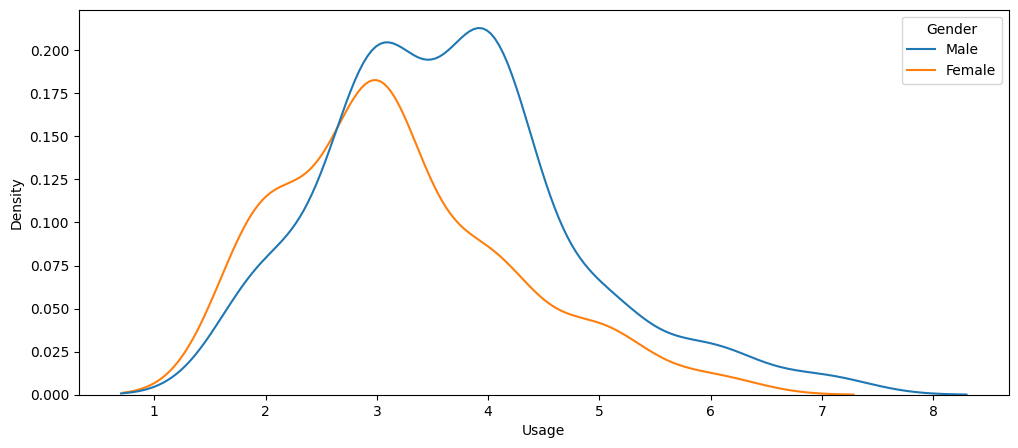

In [ ]:
# Product purchased Customers Usage per week and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Usage',hue='Gender')
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Marital Status with Usage**

 - Partnered customers usage is higher than single customers
 - Partnered customers also have greater consistency per week of 7 days per week than single customers


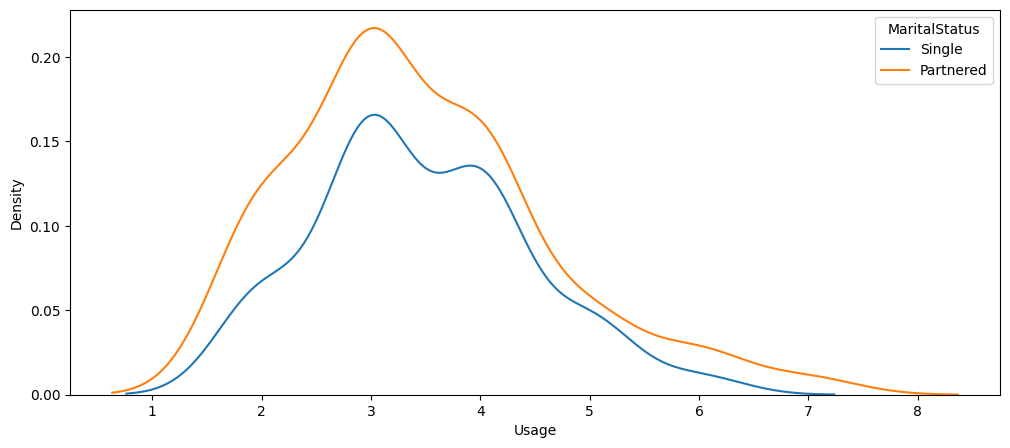

In [ ]:
# Product purchased Customers Usage per week and their Marital Status
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Usage',hue='MaritalStatus')
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Fitness with Gender**
 - Male customers are in better shape the female customers
 - Though Female customers do not have poor shape, they are also not in excellent shape
 - Some Male customers excellent body shape and few customers have poor shape as well

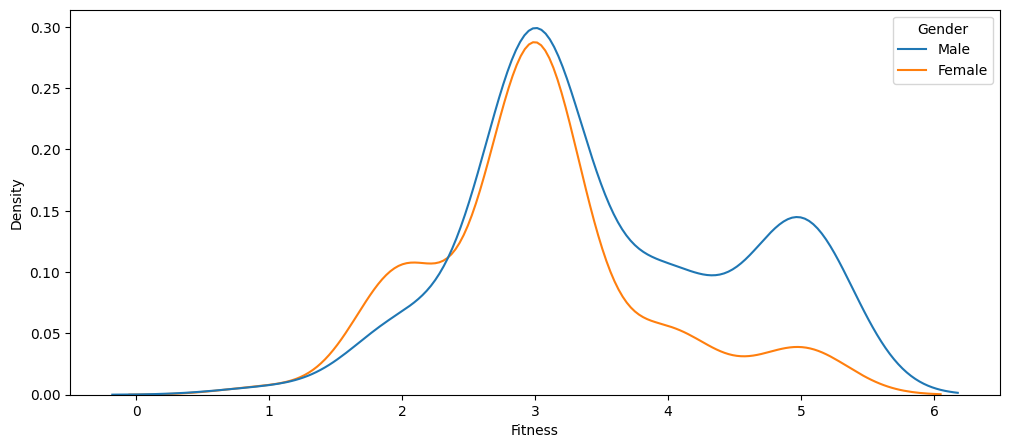

In [ ]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Fitness',hue='Gender')
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
*   **Gender with Miles**

 - Male customers have a consistent distance coverage than female customers
 - Female customers have max distance covered as just over 300 miles

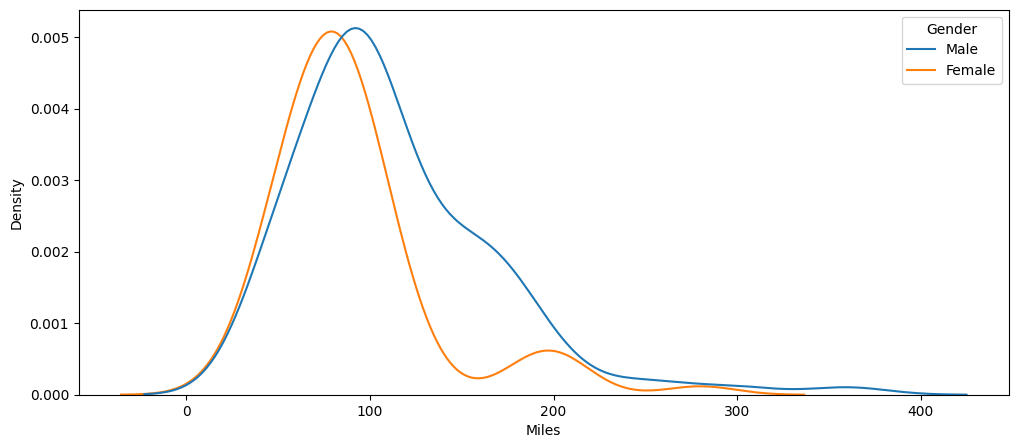

In [ ]:
# Distance covered by each Gender among the customers
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Miles',hue='Gender')
plt.show()

## **GRAPHICAL BIVARIATE ANALYSIS**
### **Scatter plot presenting Miles and Income on both axis and scatter result of Fitness rating coveting the signs of gender**

 - It shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.
 - Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level.
 - Though there is a trend with income and miles. But there are very few customers who earn a lot and run more miles.

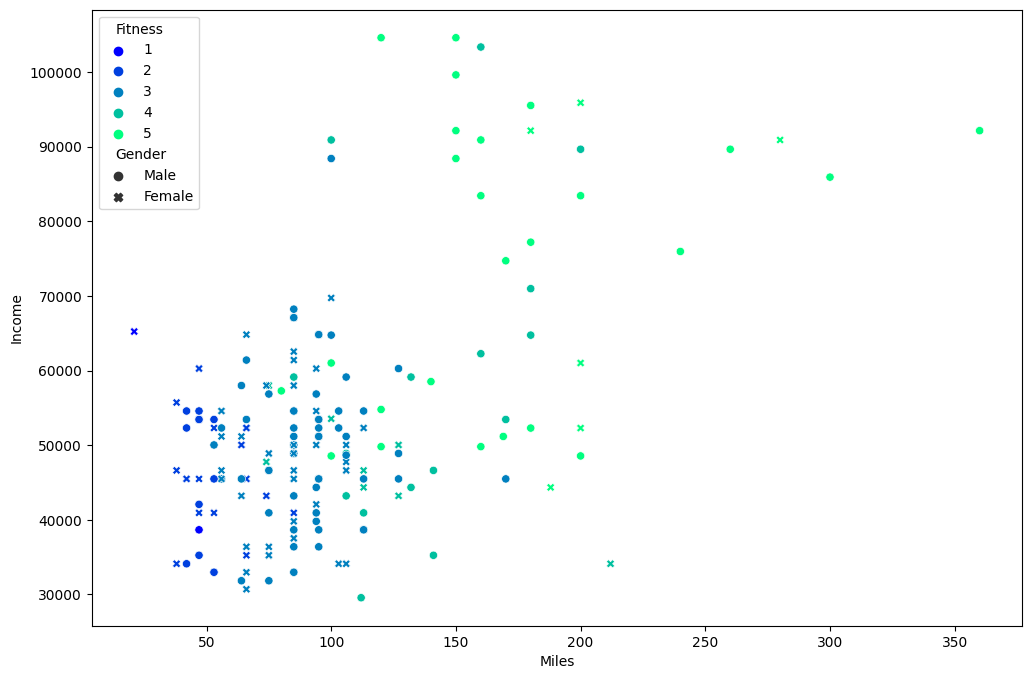

In [ ]:
# Scatter Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender',palette='winter')
plt.show()

## **Box plot presenting relationship between age and years of education, it futher depicts some outliers in age/Education.**

<Axes: xlabel='Education', ylabel='Age'>

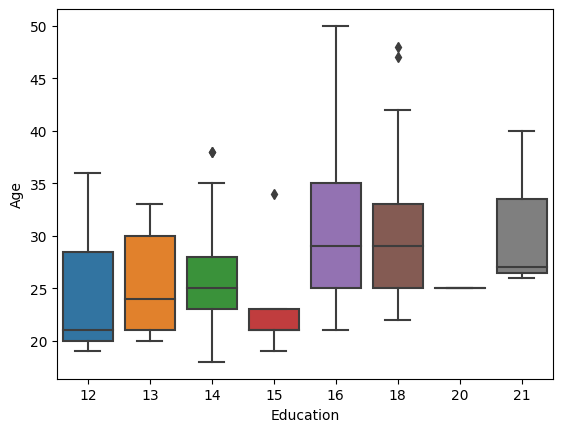

In [ ]:
sns.boxplot(x='Education',y='Age',data=df)

## **Empirical Cumulative Distribution Function - Proportional distribution for Income of customers against their Gender**

 - Customers with minimum of 30K as annual income are the ones that are able to afford aerofit products
 - Couple of Female customers less than 30K have also purchased aerofit product
 - Male customers with Higher salaries are the most common purchasers of the product

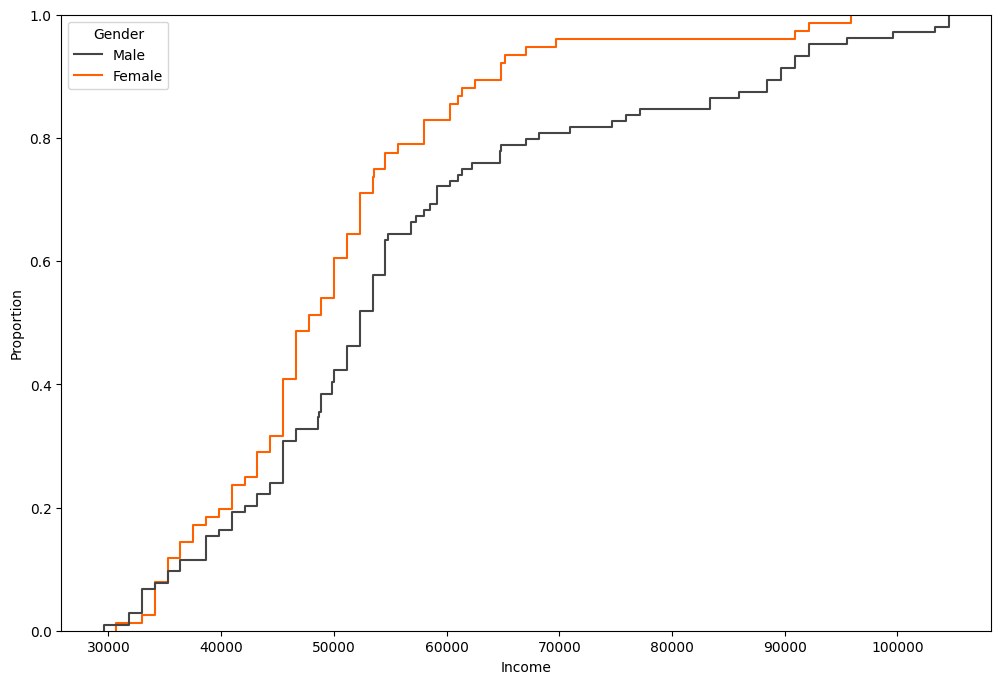

In [ ]:
plt.figure(figsize=(12,8))
sns.ecdfplot(data=df,x='Income',hue='Gender',complementary=False,palette=['#454545','#FF6000'])
plt.show()

## **Empirical Cumulative Distribution Function - Proportional distribution for Income of customers against their Marital Status**

 - Single customer have higher proportion than partnered customers
 - Partnered customers are more than single customers and they also earn more than single customers

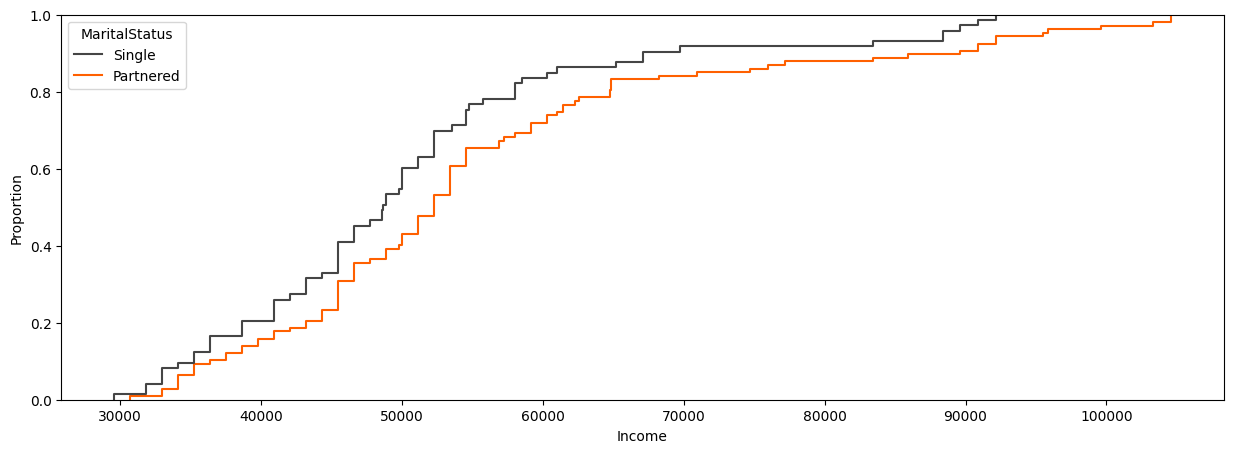

In [ ]:
plt.figure(figsize=(15,5))
sns.ecdfplot(data=df,x='Income',hue='MaritalStatus',complementary=False,palette=['#454545','#FF6000'])
plt.show()

## **Distribution of ages following a KDE plot for a particular product.**

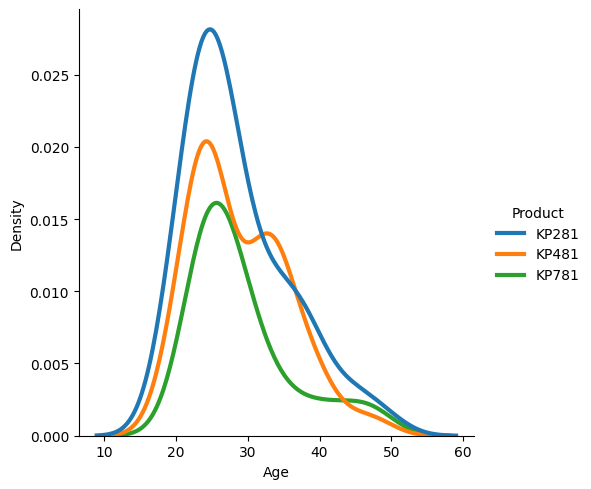

In [ ]:
sns.displot(x=df["Age"],data=df, hue=df["Product"], kind="kde",lw=3)

## **Miles covered in each product by gender and their marital status**

 - KP781 is more populat among the single and Partnered customers
 - Among the both marital statuses, Single female does not prefer much of the products.
 - Partnered Female bought KP781 treadmill compared to Partnered Male.
 - Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
 - Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
 - There are more single Males buying treadmill than single Females.
 - Single Male customers bought KP781 treadmill compared to single Female.
 - Partnered customers are more than Single customers.

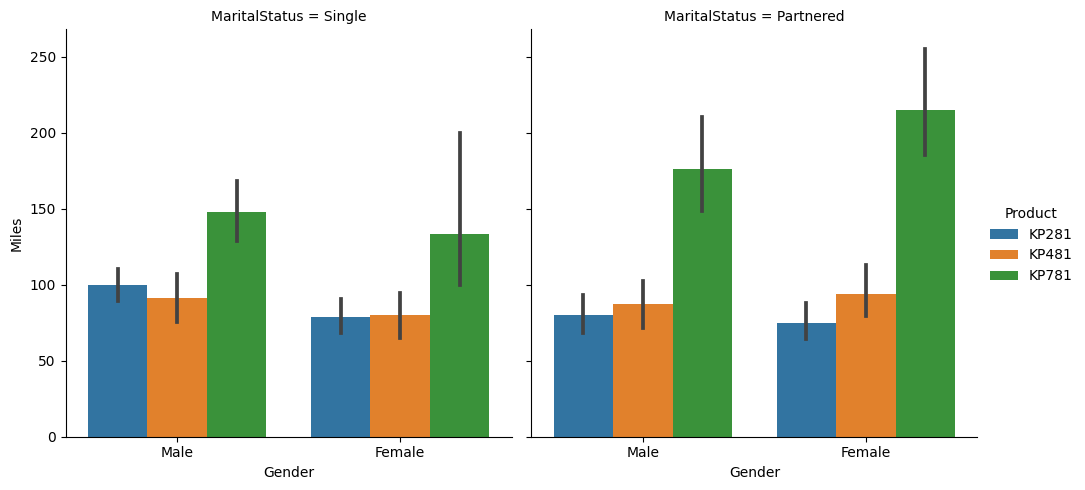

In [ ]:
sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=df,kind='bar')
plt.show()

## **Below plot depicts the different income ranges in different products.**

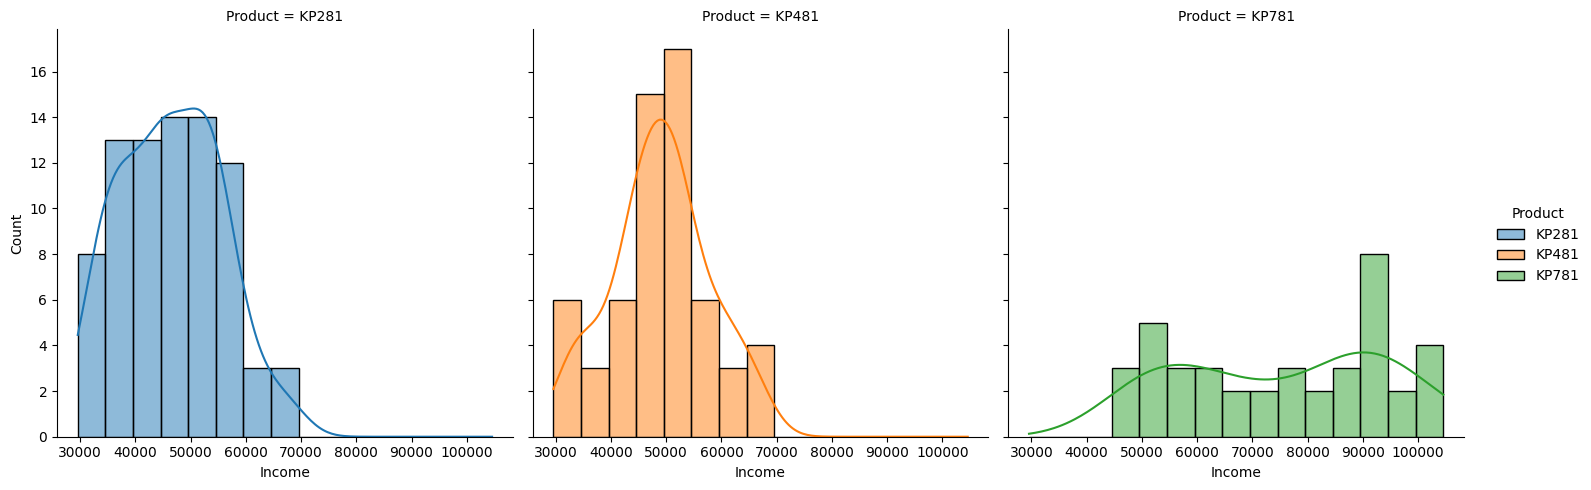

In [ ]:
sns.displot(x=df["Income"],hue=df["Product"],data=df, col=df["Product"],kde=True)
plt.show()

## **Below plot depicts miles ranges between male and female.**

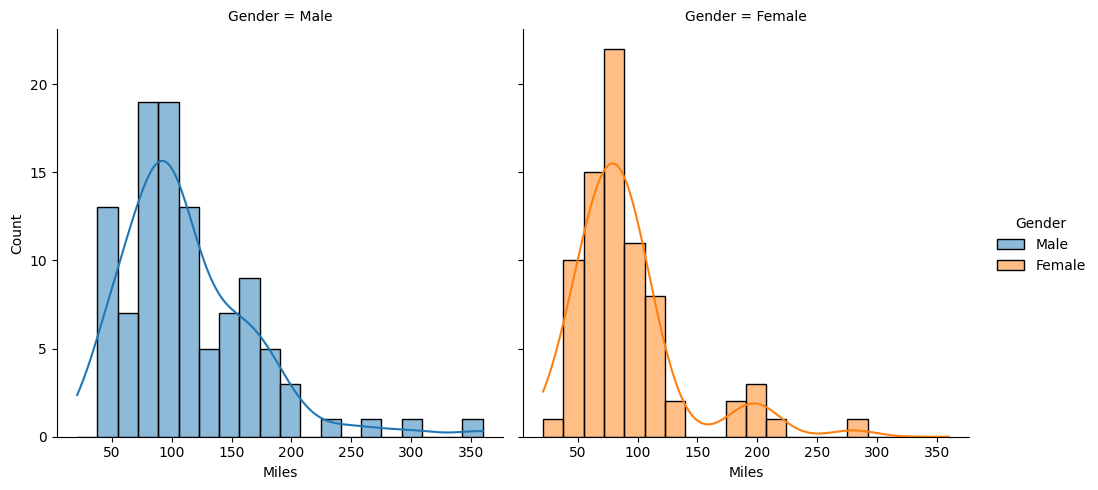

In [ ]:
sns.displot(x=df["Miles"],hue=df["Gender"],data=df, col=df["Gender"],kde=True)
plt.show()

## **Empirical Cumulative Distribution Function - Proportional distribution for Miles of customers against their Gender**

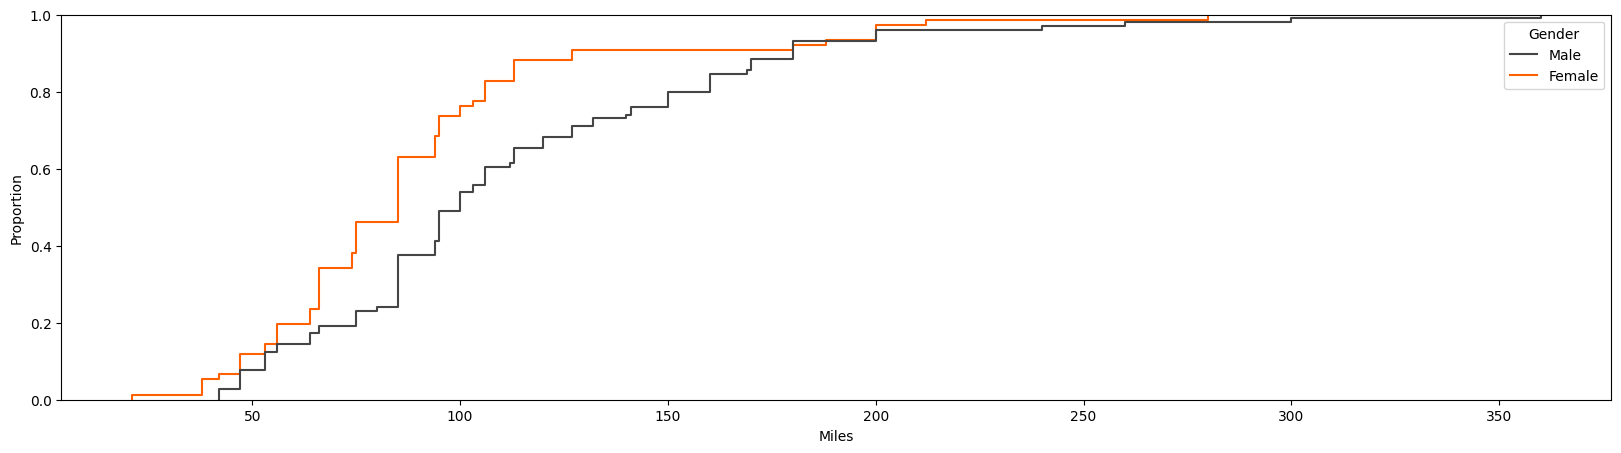

In [ ]:
plt.figure(figsize=(20,5))
sns.ecdfplot(data=df,x='Miles',hue='Gender',complementary=False,palette=['#454545','#FF6000'])
plt.show()

## **Finding mean values for each product in comparison with different continuous variables present in the dataset.**


In [ ]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

In [ ]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

In [ ]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [ ]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [ ]:
# Average Income of customer using each product
df.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [ ]:
# Average Miles of customer using each product
df.groupby('Product')['Miles'].mean()

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64

# **Marginal, Joint and Conditional Probabilities**

In [ ]:
pd.crosstab(df['Gender'],[df['Product']], normalize=True, margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.222,0.161,0.039,0.422
Male,0.222,0.172,0.183,0.578
Total,0.444,0.333,0.222,1.000


In [ ]:
pd.crosstab(df['Gender'],[df['Product']], normalize="index", margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526,0.382,0.092
Male,0.385,0.298,0.317
Total,0.444,0.333,0.222


In [ ]:
pd.crosstab(df['Gender'],[df['Product']], normalize="columns", margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.5,0.483,0.175,0.422
Male,0.5,0.517,0.825,0.578



## **Based on crosstable analysis between Gender and Products.**

*   Probability of Male:  0.578
*   Probability of Female:  0.422

---
## **Product-wise normalization P[Product| Gender]**

*   Probability of buying 'KP281' provided the customer is Male is 0.385
*   Probability of buying 'KP481' provided the customer is Male is 0.298
*   Probability of buying 'KP781' provided the customer is Male is 0.317

---

*   Probability of buying 'KP781' provided the customer is Female is 0.092
*   Probability of buying 'KP481' provided the customer is Female is 0.382
*   Probability of buying 'KP281' provided the customer is Female is 0.526
---
## **Gender wise normalization P[Gender| Product]**

*   Probability that the customer is Male provided KP281 was bought is 0.500
*   Probability that the customer is Male provided KP481 was bought is 0.517
*   Probability that the customer is Male provided KP781 was bought is 0.825


---


*   Probability that the customer is Female provided KP281 was bought is 0.500
*   Probability that the customer is Female provided KP481 was bought is 0.483
*   Probability that the customer is Female provided KP781 was bought is 0.175











In [ ]:
pd.crosstab(df["MaritalStatus"],[df["Product"]], normalize=True, margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,0.267,0.200,0.128,0.594
Single,0.178,0.133,0.094,0.406
Total,0.444,0.333,0.222,1.000


In [ ]:
pd.crosstab(df["MaritalStatus"],[df["Product"]], normalize="index", margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.449,0.336,0.215
Single,0.438,0.329,0.233
Total,0.444,0.333,0.222


In [ ]:
pd.crosstab(df["MaritalStatus"],[df["Product"]], normalize="columns", margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,0.6,0.6,0.575,0.594
Single,0.4,0.4,0.425,0.406


## **Probabilities based on crosstable analysis between Marital Status and Products.**

*   Probability of P(Single):  0.406
*   Probability of P(Partnered):  0.594

---
## **Product-wise normalization P[Product|Marital Status]**
*   Probability of buying 'KP281' provided the customer is 'Single' is 0.438
*   Probability of buying 'KP481' provided the customer is 'Single' is: 0.329
*   Probability of buying 'KP781' provided the customer is 'Single' is 0.233

---

*   Probability of buying 'KP281' provided the customer is 'Partnered' is 0.449
*   Probability of buying 'KP481' provided the customer is 'Partnered' is 0.336
*   Probability of buying 'KP781' provided the customer is 'Partnered' is 0.215

---
## **Marital  Status- wise normalizaton P[Marital Status|Product]**
*   Probability that the customer is 'Single' provided 'KP281' was bought is 0.400
*   Probability that the customer is 'Single' provided 'KP481' was bought is 0.400
*   Probability that the customer is 'Single' provided 'KP781' was bought is 0.425

---

*   Probability that the customer is 'Partnered' provided 'KP281' was bought is 0.600
*   Probability that the customer is 'Partnered' provided 'KP281' was bought is 0.600
*   Probability that the customer is 'Partnered' provided 'KP281' was bought is 0.575





In [ ]:
pd.crosstab(df["Age_band"],[df["Product"]], normalize=True, margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781,Total
Age_band,,,,
Teen,0.056,0.039,0.000,0.094
Adult,0.311,0.250,0.189,0.750
Middle Aged,0.061,0.039,0.022,0.122
Elder,0.017,0.006,0.011,0.033
Total,0.444,0.333,0.222,1.000


In [ ]:
pd.crosstab(df["Age_band"],[df["Product"]], normalize="index", margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781
Age_band,,,
Teen,0.588,0.412,0.000
Adult,0.415,0.333,0.252
Middle Aged,0.500,0.318,0.182
Elder,0.500,0.167,0.333
Total,0.444,0.333,0.222


In [ ]:
pd.crosstab(df["Age_band"],[df["Product"]], normalize="columns", margins=True, margins_name='Total').round(3)

Product,KP281,KP481,KP781,Total
Age_band,,,,
Teen,0.125,0.117,0.00,0.094
Adult,0.700,0.750,0.85,0.750
Middle Aged,0.138,0.117,0.10,0.122
Elder,0.038,0.017,0.05,0.033


## **Age_band**
### **0-21 Teen**
### **22-35 Adult**
### **36-45-- Middle aged**
### **45-60-- Elder**

## **Probabilities based on crosstable analysis between Age_band and Products.**

*   Probability of P(Teen): 0.094
*   Probability of P(Adult): 0.750
*   Probability of P(Elder): 0.122
*   Probability of P(Elder): 0.033
---
## **Product_band wise normalization P[Product|Age_band]**

*   Probability of buying 'KP281' provided the age band is Teen: 0.588
*   Probability of buying 'KP481' provided the age band is Teen: 0.412
*   Probability of buying 'KP781' provided the age band is Teen: 0.000
---

*   Probability of buying 'KP281' provided the age band is Adult: 0.415
*   Probability of buying 'KP481' provided the age band is Adult: 0.333
*   Probability of buying 'KP781' provided the age band is Adult: 0.252
---

*   Probability of buying 'KP281' provided the age band is middle-aged: 0.500
*   Probability of buying 'KP481' provided the age band is middle-aged: 0.318
*   Probability of buying 'KP781' provided the age band is middle-aged: 0.182
---

*   Probability of buying 'KP281' provided the age band is Elder: 0.500
*   Probability of buying 'KP281' provided the age band is Elder: 0.167
*   Probability of buying 'KP281' provided the age band is Elder: 0.333

## **Age_band wise normalization P[Age_band|Product]**

*   Probability that the age_band represents 'Teen' provided 'KP281' was bought is: 0.125
*   Probability that the age_band represents 'Teen' provided 'KP481' was bought is: 0.117
*   Probability that the age_band represents 'Teen' provided 'KP781' was bought is: 0.00
---

*   Probability that the age_band represents 'Adult' provided 'KP281' was bought is: 0.038
*   Probability that the age_band represents 'Adult' provided 'KP481' was bought is: 0.017
*   Probability that the age_band represents 'Adult' provided 'KP781' was bought is: 0.050
---

*   Probability that the age_band represents 'Middle aged' provided 'KP281' was bought is: 0.138
*   Probability that the age_band represents 'Middle aged' provided 'KP481' was bought is: 0.117
*   Probability that the age_band represents 'Middle aged' provided 'KP781' was bought is: 0.100
---

*   Probability that the age_band represents 'Elder' provided 'KP281' was bought is: 0.125
*   Probability that the age_band represents 'Elder' provided 'KP481' was bought is: 0.117
*   Probability that the age_band represents 'Elder' provided 'KP781' was bought is: 0.00

In [ ]:
pd.crosstab(df["Income_band"],[df["Product"]], normalize=True, margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781,Total
Income_band,,,,
Low,0.26,0.14,0.00,0.39
Medium,0.18,0.19,0.09,0.46
High,0.01,0.01,0.04,0.06
Very high,0.00,0.00,0.09,0.09
Total,0.44,0.33,0.22,1.00


In [ ]:
pd.crosstab(df["Income_band"],[df["Product"]], normalize="index", margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781
Income_band,,,
Low,0.65,0.35,0.00
Medium,0.39,0.41,0.20
High,0.20,0.10,0.70
Very high,0.00,0.00,1.00
Total,0.44,0.33,0.22


In [ ]:
pd.crosstab(df["Income_band"],[df["Product"]], normalize="columns", margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781,Total
Income_band,,,,
Low,0.57,0.42,0.00,0.39
Medium,0.40,0.57,0.40,0.46
High,0.02,0.02,0.18,0.06
Very high,0.00,0.00,0.42,0.09


## **Income_band**

### **28k-47k : Low**
### **48k-66k : Medium**
### **67k-85k : High**
### **86k-105k : Very high**

## **Probabilities based on crosstable analysis between Income_band and Products.**

*   Probability of P(Low): 0.39
*   Probability of P(Medium): 0.46
*   Probability of P(High): 0.06
*   Probability of P(Very high): 0.09
---
## **Product_band wise Normalization P[Product|Income_band]**
*   Probability of buying 'KP281' provided the Income band is Low: 0.65
*   Probability of buying 'KP481' provided the Income band is Low: 0.35
*   Probability of buying 'KP781' provided the Income band is Low: 0.00
---

*   Probability of buying 'KP281' provided the Income band is medium: 0.39
*   Probability of buying 'KP481' provided the Income band is medium: 0.41
*   Probability of buying 'KP781' provided the Income band is medium: 0.20
---

*   Probability of buying 'KP281' provided the Income band is high: 0.20
*   Probability of buying 'KP481' provided the Income band is high: 0.10
*   Probability of buying 'KP781' provided the Income band is high: 0.70
---

*   Probability of buying 'KP281' provided the Income band is very high: 0.00
*   Probability of buying 'KP281' provided the Income band is very high: 0.00
*   Probability of buying 'KP281' provided the Income band is very high: 1.00

## **Income_band wise Normalization P[Income_band|Product]**
*   Probability that the income_band represents "low" provided 'KP281' was bought is: 0.57
*   Probability that the income_band represents "low" provided 'KP481' was bought is: 0.42
*   Probability that the income_band represents "low" provided 'KP781' was bought is: 0.00
---

*   Probability that the  income_band represents "medium" provided 'KP281' was bought is: 0.40
*   Probability that the income_band represents "medium" provided 'KP481' was bought is: 0.57
*   Probability that the income_band represents "medium" provided 'KP781' was bought is: 0.40
---

*   Probability that the income_band represents "high" provided 'KP281' was bought is: 0.02
*   Probability that the income_band represents "high" provided 'KP481' was bought is: 0.02
*   Probability that the income_band represents "high" provided 'KP781' was bought is: 0.18
---

*   Probability that the income_band represents "very high" provided 'KP281' was bought is: 0.00
*   Probability that the income_band represents "very high" provided 'KP481' was bought is: 0.00
*   Probability that the income_band represents "very high" provided 'KP781' was bought is: 0.42

In [ ]:
pd.crosstab(df["Fitness_Shapes"],[df["Product"]], normalize=True, margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781,Total
Fitness_Shapes,,,,
Poor Shape,0.01,0.01,0.00,0.01
Bad Shape,0.08,0.07,0.00,0.14
Average shape,0.30,0.22,0.02,0.54
Good shape,0.05,0.04,0.04,0.13
Excellent Shape,0.01,0.00,0.16,0.17
Total,0.44,0.33,0.22,1.00


In [ ]:
pd.crosstab(df["Fitness_Shapes"],[df["Product"]], normalize="index", margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781
Fitness_Shapes,,,
Poor Shape,0.50,0.50,0.00
Bad Shape,0.54,0.46,0.00
Average shape,0.56,0.40,0.04
Good shape,0.38,0.33,0.29
Excellent Shape,0.06,0.00,0.94
Total,0.44,0.33,0.22


In [ ]:
pd.crosstab(df["Fitness_Shapes"],[df["Product"]], normalize="columns", margins=True, margins_name='Total').round(2)

Product,KP281,KP481,KP781,Total
Fitness_Shapes,,,,
Poor Shape,0.01,0.02,0.00,0.01
Bad Shape,0.18,0.20,0.00,0.14
Average shape,0.68,0.65,0.10,0.54
Good shape,0.11,0.13,0.18,0.13
Excellent Shape,0.02,0.00,0.72,0.17


## **Fitness_Shapes**

### **1-- Poor Shape**
### **2-- Bad Shape**
### **3-- Average Shape**
### **4-- Good Shape**
### **5-- Excellent Shape**

## **Probabilities based on crosstable analysis between Fitness_shapes and Products.**

*   Probability of P(Poor shape): 0.01
*   Probability of P(Bad shape): 0.14
*   Probability of P(Average shape): 0.54
*   Probability of P(Good shape): 0.13
*   Probability of P(Excellent shape): 0.17
---
## **Product_band wise Normalization P[Product|Fitness_Shapes]**
*   Probability of buying 'KP281' provided that the fitness_shape is "Poor": 0.50
*   Probability of buying 'KP481' provided that the fitness_shape is "Poor": 0.50
*   Probability of buying 'KP781' provided that the fitness_shape is "Poor": 0.00
---

*   Probability of buying 'KP281' provided the fitness_shape is "Bad": 0.54
*   Probability of buying 'KP481' provided the fitness_shape is "Bad": 0.46
*   Probability of buying 'KP781' provided the fitness_shape is "Bad": 0.00
---

*   Probability of buying 'KP281' provided the fitness_shape is "Average": 0.56
*   Probability of buying 'KP481' provided the fitness_shape is "Average": 0.40
*   Probability of buying 'KP781' provided the fitness_shape is "Average": 0.04
---

*   Probability of buying 'KP281' provided the fitness_shape is "Good": 0.38
*   Probability of buying 'KP281' provided the fitness_shape is "Good": 0.39
*   Probability of buying 'KP281' provided the fitness_shape is "Good": 0.29

---

*   Probability of buying 'KP281' provided the fitness_shape is "Excellent": 0.06
*   Probability of buying 'KP281' provided the fitness_shape is "Excellent": 0.00
*   Probability of buying 'KP281' provided the fitness_shape is "Excellent": 0.94

## **Fitness_shapes wise Normalization P[Fitness_shapes|Product]**
*   Probability that the fitness_shape is "Poor" provided 'KP281' was bought is: 0.01
*   Probability that the fitness_shape is "Poor" provided 'KP481' was bought is: 0.02
*   Probability that the fitness_shape is "Poor" provided 'KP781' was bought is: 0.00
---

*   Probability that the fitness_shape is "Bad" provided 'KP281' was bought is: 0.18
*   Probability that the fitness_shape is "Bad" provided 'KP481' was bought is: 0.20
*   Probability that the fitness_shape is "Bad" provided 'KP781' was bought is: 0.00
---

*   Probability that the fitness_shape is "Average" provided 'KP281' was bought is: 0.68
*   Probability that the fitness_shape is "Average" provided 'KP481' was bought is: 0.65
*   Probability that the fitness_shape is "Average" provided 'KP781' was bought is: 0.10
---

*   Probability that the fitness_shape is "Good" provided 'KP281' was bought is: 0.11
*   Probability that the fitness_shape is "Good" provided 'KP481' was bought is: 0.13
*   Probability that the fitness_shape is "Good" provided 'KP781' was bought is: 0.18
---

*   Probability that the fitness_shape is "Excellent" provided 'KP281' was bought is: 0.02
*   Probability that the fitness_shape is "Excellent" provided 'KP481' was bought is: 0.00
*   Probability that the fitness_shape is "Excellent" provided 'KP781' was bought is: 0.72

In [ ]:
pd.crosstab([df.Age_band,df.Gender],[df["Product"]], normalize=True, margins=True, margins_name='Total').round(2)

Product             KP281  KP481  KP781  Total
Age_band    Gender                            
Teen        Female   0.02   0.01   0.00   0.03
            Male     0.03   0.03   0.00   0.06
Adult       Female   0.17   0.13   0.04   0.34
            Male     0.14   0.12   0.15   0.41
Middle Aged Female   0.02   0.02   0.00   0.04
            Male     0.04   0.02   0.02   0.08
Elder       Female   0.01   0.00   0.00   0.01
            Male     0.01   0.01   0.01   0.02
Total                0.44   0.33   0.22   1.00

In [ ]:
pd.crosstab([df.Age_band,df.Gender],[df["Product"]], normalize="index", margins=True, margins_name='Total').round(2)

Product             KP281  KP481  KP781
Age_band    Gender                     
Teen        Female   0.67   0.33   0.00
            Male     0.55   0.45   0.00
Adult       Female   0.51   0.38   0.11
            Male     0.34   0.30   0.36
Middle Aged Female   0.43   0.57   0.00
            Male     0.53   0.20   0.27
Elder       Female   1.00   0.00   0.00
            Male     0.25   0.25   0.50
Total                0.44   0.33   0.22

In [ ]:
pd.crosstab([df.Age_band,df.Gender],[df["Product"]], normalize="columns", margins=True, margins_name='Total').round(2)

Product             KP281  KP481  KP781  Total
Age_band    Gender                            
Teen        Female   0.05   0.03   0.00   0.03
            Male     0.08   0.08   0.00   0.06
Adult       Female   0.39   0.38   0.18   0.34
            Male     0.31   0.37   0.68   0.41
Middle Aged Female   0.04   0.07   0.00   0.04
            Male     0.10   0.05   0.10   0.08
Elder       Female   0.02   0.00   0.00   0.01
            Male     0.01   0.02   0.05   0.02

## **Age_band**
### **0-21 Teen**
### **22-35 Adult**
### **36-45-- Middle aged**
### **45-60-- Elder**

## **Probabilities based on crosstable analysis between (Age_band & Gender) against Products.**

*   Probability of Teen(female): 0.03
*   Probability of Teen(Male): 0.06
*   Probability of Adult(female): 0.34
*   Probability of Adult(Male): 0.41
*   Probability of Middle aged(female): 0.04
*   Probability of Middle aged(Male): 0.08
*   Probability of Elder: 0.01
*   Probability of Elder: 0.02

---
## **Product wise normalization P[Product|Gender/Age_band]**
*   Probability of buying "KP281" provided that its a teen(female) is 0.67
*   Probability of buying "KP481" provided that its a teen(female) is 0.33
*   Probability of buying "KP781" provided that its a teen(female) is 0.00
*   Probability of buying "KP281" provided that its a teen(male) is 0.55
*   Probability of buying "KP481" provided that its a teen(male) is 0.45
*   Probability of buying "KP781" provided that its a teen(male) is 0.00
*   Probability of buying "KP281" provided that its a adult(female) is 0.51
*   Probability of buying "KP481" provided that its a adult(female) is 0.38
*   Probability of buying "KP781" provided that its a adult(female) is 0.11
*   Probability of buying "KP281" provided that its a adult(male) is 0.34
*   Probability of buying "KP481" provided that its a adult(male) is 0.30
*   Probability of buying "KP781" provided that its a adult(male) is 0.36
*   Probability of buying "KP281" provided that its a middle aged(female) is 0.43
*   Probability of buying "KP481" provided that its a middle aged(female) is 0.57
*   Probability of buying "KP781" provided that its a middle aged(female) is 0.00
*   Probability of buying "KP281" provided that its a middle aged(male) is 0.53
*   Probability of buying "KP481" provided that its a middle aged(male) is 0.20
*   Probability of buying "KP781" provided that its a middle aged(male) is 0.27
*   Probability of buying "KP281" provided that its a elder(female) is 1.00
*   Probability of buying "KP481" provided that its a elder(female) is 0.00
*   Probability of buying "KP781" provided that its a elder(female) is 0.00
*   Probability of buying "KP281" provided that its a elder(male) is 0.25
*   Probability of buying "KP481" provided that its a elder(male) is 0.25
*   Probability of buying "KP781" provided that its a elder(male) is 0.50

---

## **Gender/Age_band wise normalization P[Gender/Age_band|Product]**

*   Probability that the "female" is in "teen" age range and'KP281' was bought is:0.05
*   Probability that the "female" is in "teen" age range and'KP481' was bought is:0.03
*   Probability that the "male" is in "teen" age range and'KP281' was bought is:0.08
*   Probability that the "male" is in "teen" age range and'KP481' was bought is:0.08

*   Probability that the "female" is in "adult" age range and'KP281' was bought is:0.39
*   Probability that the "female" is in "adult" age range and'KP481' was bought is:0.38
*   Probability that the "female" is in "adult" age range and'KP781' was bought is:0.18
*   Probability that the "male" is in "adult" age range and'KP281' was bought is:0.31
*   Probability that the "male" is in "adult" age range and'KP481' was bought is:0.37
*   Probability that the "male" is in "adult" age range and'KP781' was bought is:0.68

*   Probability that the "female" is in "middle aged" age range and'KP281' was bought is:0.04
*   Probability that the "female" is in "middle aged" age range and'KP481' was bought is:0.07
*   Probability that the "female" is in "middle aged" age range and'KP781' was bought is:0.00
*   Probability that the "male" is in "middle aged" age range and'KP281' was bought is:0.10
*   Probability that the "male" is in "middle aged" age range and'KP481' was bought is:0.05
*   Probability that the "male" is in "middle aged" age range and'KP781' was bought is:0.10

*   Probability that the "female" is in "elder" age range and'KP281' was bought is:0.02
*   Probability that the "female" is in "elder" age range and'KP481' was bought is:0.00
*   Probability that the "female" is in "elder" age range and'KP781' was bought is:0.00
*   Probability that the "male" is in "elder" age range and'KP281' was bought is:0.01
*   Probability that the "male" is in "elder" age range and'KP481' was bought is:0.02
*   Probability that the "male" is in "elder" age range and'KP781' was bought is:0.05

In [ ]:
pd.crosstab([df.MaritalStatus,df.Fitness_Shapes],[df["Product"]], normalize=True, margins=True, margins_name='Total').round(2)

Product                        KP281  KP481  KP781  Total
MaritalStatus Fitness_Shapes                             
Partnered     Poor Shape        0.01   0.00   0.00   0.01
              Bad Shape         0.06   0.04   0.00   0.10
              Average shape     0.17   0.14   0.01   0.32
              Good shape        0.02   0.02   0.03   0.07
              Excellent Shape   0.01   0.00   0.09   0.10
Single        Poor Shape        0.00   0.01   0.00   0.01
              Bad Shape         0.02   0.03   0.00   0.04
              Average shape     0.13   0.08   0.02   0.22
              Good shape        0.03   0.02   0.01   0.06
              Excellent Shape   0.01   0.00   0.07   0.07
Total                           0.44   0.33   0.22   1.00

## **Fitness_shapes**
### **1-- Poor Shape**
### **2-- Bad Shape**
### **3-- Average Shape**
### **4-- Good Shape**
### **5-- Excellent Shape**

## **Probabilities based on crosstable analysis between (Marital Status & Fitness_Shapes) and Products.**

*   Probability of partnered(poor shape): 0.01
*   Probability of partnered(bad shape): 0.10
*   Probability of partnered(average shape): 0.32
*   Probability of partnered(good shape): 0.07
*   Probability of partnered(excellent shape): 0.10

*   Probability of single(Poor shape): 0.01
*   Probability of single(bad shape): 0.04
*   Probability of single(average shape): 0.22
*   Probability of single(good shape): 0.06
*   Probability of single(excellent shape): 0.07



In [ ]:
pd.crosstab([df.MaritalStatus,df.Fitness_Shapes],[df["Product"]], normalize="index", margins=True, margins_name='Total').round(2)

Product                        KP281  KP481  KP781
MaritalStatus Fitness_Shapes                      
Partnered     Poor Shape        1.00   0.00   0.00
              Bad Shape         0.61   0.39   0.00
              Average shape     0.54   0.44   0.02
              Good shape        0.31   0.31   0.38
              Excellent Shape   0.06   0.00   0.94
Single        Poor Shape        0.00   1.00   0.00
              Bad Shape         0.38   0.62   0.00
              Average shape     0.57   0.35   0.08
              Good shape        0.45   0.36   0.18
              Excellent Shape   0.08   0.00   0.92
Total                           0.44   0.33   0.22

## **Fitness_Shapes**
### **1-- Poor Shape**
### **2-- Bad Shape**
### **3-- Average Shape**
### **4-- Good Shape**
### **5-- Excellent Shape**

## **Product based normalization P[Product|Marital Status/Fitness_shapes]**
*   Probability of buying "KP281" provided that its partnered and in poor shape is 1.00
*   Probability of buying "KP281" provided that its partnered and in bad shape is 0.61
*   Probability of buying "KP481" provided that its partnered and in bad shape is 0.39

*   Probability of buying "KP281" provided that its partnered and in average shape is 0.54
*   Probability of buying "KP481" provided that its partnered and in average shape is 0.44
*   Probability of buying "KP781" provided that its partnered and in average shape is 0.02

*   Probability of buying "KP281" provided that its partnered and in good shape is 0.31
*   Probability of buying "KP481" provided that its partnered and in good shape is 0.31
*   Probability of buying "KP781" provided that its partnered and in good shape is 0.38

*   Probability of buying "KP281" provided that its partnered and in excellent shape is 0.06
*   Probability of buying "KP781" provided that its partnered and in excellent shape is 0.94


---
*   Probability of buying "KP481" provided that its single and in poor shape is 1.00

*   Probability of buying "KP281" provided that its single and in bad shape is 0.38
*   Probability of buying "KP481" provided that its single and in bad shape is 0.62

*   Probability of buying "KP281" provided that its single and in average shape is 0.57
*   Probability of buying "KP481" provided that its single and in average shape is 0.35
*   Probability of buying "KP781" provided that its single and in average shape is 0.08

*   Probability of buying "KP281" provided that its single and in good shape is 0.45
*   Probability of buying "KP481" provided that its single and in good shape is 0.36
*   Probability of buying "KP781" provided that its single and in good shape is 0.18

*   Probability of buying "KP281" provided that its single and in excellent shape is 0.08
*   Probability of buying "KP781" provided that its single and in excellent shape is 0.92

In [ ]:
pd.crosstab([df.MaritalStatus,df.Fitness_Shapes],[df["Product"]], normalize="columns", margins=True, margins_name='Total').round(2)

Product                        KP281  KP481  KP781  Total
MaritalStatus Fitness_Shapes                             
Partnered     Poor Shape        0.01   0.00   0.00   0.01
              Bad Shape         0.14   0.12   0.00   0.10
              Average shape     0.39   0.42   0.02   0.32
              Good shape        0.05   0.07   0.12   0.07
              Excellent Shape   0.01   0.00   0.42   0.10
Single        Poor Shape        0.00   0.02   0.00   0.01
              Bad Shape         0.04   0.08   0.00   0.04
              Average shape     0.29   0.23   0.08   0.22
              Good shape        0.06   0.07   0.05   0.06
              Excellent Shape   0.01   0.00   0.30   0.07

## **Fitness_Shapes**
### **1-- Poor Shape**
### **2-- Bad Shape**
### **3-- Average Shape**
### **4-- Good Shape**
### **5-- Excellent Shape**

## **Product based normalization P[Marital Status/Fitness_shapes|Product]**
*   Probability that the person is partnered/poor shape and they bought 'KP281' is:0.01
*   Probability that the person is partnered/bad shape and they bought 'KP281' is:0.14
*   Probability that the person is partnered/bad shape and they bought 'KP481' is:0.12
*   Probability that the person is partnered/average shape and they bought 'KP281' is:0.39
*   Probability that the person is partnered/average shape and they bought 'KP481' is:0.42
*   Probability that the person is partnered/average shape and they bought 'KP781' is:0.02
*   Probability that the person is partnered/good shape and they bought 'KP281' is:0.05
*   Probability that the person is partnered/good shape and they bought 'KP481' is:0.07
*   Probability that the person is partnered/good shape and they bought 'KP781' is:0.12
*   Probability that the person is partnered/good shape and they bought 'KP281' is:0.01
*   Probability that the person is partnered/good shape and they bought 'KP781' is:0.42

---

*   Probability that the person is single/poor shape and they bought 'KP481' is:0.02
*   Probability that the person is single/bad shape and they bought 'KP281' is:0.04
*   Probability that the person is single/bad shape and they bought 'KP481' is:0.08
*   Probability that the person is single/average shape and they bought 'KP281' is:0.29
*   Probability that the person is single/average shape and they bought 'KP481' is:0.23
*   Probability that the person is single/average shape and they bought 'KP781' is:0.08
*   Probability that the person is single/good shape and they bought 'KP281' is:0.06
*   Probability that the person is single/good shape and they bought 'KP481' is:0.07
*   Probability that the person is single/good shape and they bought 'KP781' is:0.05
*   Probability that the person is single/excellent shape and they bought 'KP281' is:0.01
*   Probability that the person is single/excellent shape and they bought 'KP781' is:0.30

In [ ]:
pd.crosstab([df.Education,df.Income_band],[df["Product"]], normalize=True, margins=True, margins_name='Total').round(2)

Product                KP281  KP481  KP781  Total
Education Income_band                            
12        Low           0.01   0.01   0.00   0.02
13        Low           0.02   0.01   0.00   0.02
          Medium        0.00   0.01   0.00   0.01
14        Low           0.11   0.09   0.00   0.21
          Medium        0.06   0.03   0.01   0.09
          Very high     0.00   0.00   0.01   0.01
15        Low           0.02   0.00   0.00   0.02
          High          0.00   0.01   0.00   0.01
16        Low           0.09   0.03   0.00   0.13
          Medium        0.12   0.14   0.05   0.31
          High          0.00   0.00   0.01   0.01
          Very high     0.00   0.00   0.03   0.03
18        Medium        0.00   0.01   0.03   0.04
          High          0.01   0.00   0.02   0.03
          Very high     0.00   0.00   0.06   0.06
20        High          0.00   0.00   0.01   0.01
21        High          0.00   0.00   0.01   0.01
          Very high     0.00   0.00   0.01   0.01
Total                   0.44   0.33   0.22   1.00

## **Income_band**

### **28k-47k : Low**
### **48k-66k : Medium**
### **67k-85k : High**
### **86k-105k : Very high**

## **Probabilities based on crosstab analysis between years of education & income band with products**

*   Probability of 12 yrs of education and with a low income band is 0.02

*   Probability of 13 yrs of education and with a low income band is 0.02
*   Probability of 13 yrs of education and with a medium income band is 0.01

*   Probability of 14 yrs of education and with a low income band is 0.21
*   Probability of 14 yrs of education and with a medium income band is 0.09
*   Probability of 14 yrs of education and with a very high income band is 0.01

*   Probability of 15 yrs of education and with a low income band is 0.02
*   Probability of 15 yrs of education and with a high income band is 0.01

*   Probability of 16 yrs of education and with a low income band is 0.13
*   Probability of 16 yrs of education and with a medium  income band is 0.31
*   Probability of 16 yrs of education and with a high income band is 0.01
*   Probability of 16 yrs of education and with a very high income band is 0.03

*   Probability of 18 yrs of education and with a medium  income band is 0.04
*   Probability of 18 yrs of education and with a high income band is 0.03
*   Probability of 18 yrs of education and with a very high income band is 0.06

*   Probability of 20 yrs of education and with a medium  income band is 0.01
*   Probability of 21 yrs of education and with a high income band is 0.01
*   Probability of 21 yrs of education and with a very high income band is 0.01

In [ ]:
pd.crosstab([df.Miles_band,df.Usage],[df["Product"]], normalize="all", margins=True, margins_name='Total').round(2)

Product           KP281  KP481  KP781  Total
Miles_band Usage                            
Low        2       0.09   0.08   0.00   0.17
           3       0.17   0.08   0.00   0.25
           4       0.04   0.02   0.01   0.06
Medium     2       0.01   0.00   0.00   0.01
           3       0.04   0.09   0.01   0.13
           4       0.08   0.05   0.08   0.21
           5       0.01   0.01   0.05   0.07
           6       0.00   0.00   0.02   0.02
           7       0.00   0.00   0.01   0.01
High       4       0.00   0.00   0.01   0.01
           5       0.00   0.01   0.02   0.02
           6       0.00   0.00   0.02   0.02
Very high  4       0.00   0.00   0.01   0.01
           6       0.00   0.00   0.01   0.01
           7       0.00   0.00   0.01   0.01
Total              0.44   0.33   0.22   1.00

## **Miles band**
### **20-85 : Low**
### **86-190 : Medium**
### **191-275 : High**
### **276-360 : Very high**

## **Probabilities based on crosstab analysis between miles_band & usage with products**

*   Probability of Low miles band with usage 2 times a week: 0.17
*   Probability of Low miles band with usage 3 times a week: 0.25
*   Probability of Low miles band with usage 4 times a week: 0.06


---


*   Probability of Medium miles band with usage 2 times a week: 0.01
*   Probability of Medium miles band with usage 3 times a week: 0.13
*   Probability of Medium miles band with usage 4 times a week: 0.21
*   Probability of Medium miles band with usage 5 times a week: 0.07
*   Probability of Medium miles band with usage 6 times a week: 0.02
*   Probability of Medium miles band with usage 7 times a week: 0.01


---


*   Probability of high miles band with usage 4 times a week: 0.01
*   Probability of high miles band with usage 5 times a week: 0.02
*   Probability of high miles band with usage 6 times a week: 0.02


---


*   Probability of very high miles band with usage 4 times a week: 0.01
*   Probability of very high miles band with usage 6 times a week: 0.01
*   Probability of very high miles band with usage 7 times a week: 0.01
---


## **Objective: Customer Profiling for Each Product**

**KP281**

 - Easily affordable entry level product, which is also the maximum selling product.


 - KP281 is the most popular product among the entry level customers.


 - This product is easily afforded by both Male and Female customers.


 - Average distance covered in this model is around 70 to 90 miles.


 - Product is used 3 to 4 times a week.


 - Most of the customer who have purchased the product have rated Average shape as the fitness rating.


 - Younger to Elder beginner level customers prefer this product.


 - Single female & Partnered male customers bought this product more than single male customers.


 - Income range between 39K to 53K have preferred this product.


**KP481**

 - This is an Intermediate level Product.


 - KP481 is the second most popular product among the customers.


 - Fitness Level of this product users varies from Bad to Average Shape depending on their usage.


 - Customers Prefer this product mostly to cover more miles than fitness.


 - Average distance covered in this product is from 70 to 130 miles per week.


 - More Female customers prefer this product than males.


 - Probability of Female customer buying KP481 is significantly higher than male.


 - KP481 product is specifically recommended for Female customers who are intermediate user.


 - Three different age groups prefer this product - Teen, Adult and middle aged.


 - Average Income of the customer who buys KP481 is 49K.


 - Average Usage of this product is 3 days per week.


 - More Partnered customers prefer this product.


 - There are slightly more male buyers of the KP481.


 - The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.


 - The buyers of KP481 in Single & Partnered, Male & Female are same.


 - The age range of KP481 treadmill customers is roughly between 24-34 years.


**KP781**

 - Due to the High Price & being the advanced type, customer prefers less of this product.


 - Customers use this product mainly to cover more distance.


 - Customers who use this product have rated excelled shape as fitness rating.


 - Customer walk/run average 120 to 200 or more miles per week on his product.


 - Customers use 4 to 5 times a week at least.


 - Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.


 - Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).


 - Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.


 - Middle aged to higher age customers tend to use this model to cover more distance.


 - Average Income of KP781 buyers are over 75K per annum


 - Partnered Female bought KP781 treadmill compared to Partnered Male.


 - Customers who have more experience with previous aerofit products tend to buy this product


 - This product is preferred by the customer where the correlation between Education and Income is High.


## **Business Insights**

 - Number of customers who bought products KP281, KP481 and KP781 are in ratio 4 : 3 : 2. That means for every 9 customers, 4 customers bought KP281, 3 bought KP481 and 2 bought KP781.
 - There are more male customers than females. Around 60% of the total customers are males.
 - There are more customers who are partnered than single. Almost 60% of customers are partnered.
 - Age of the customers varies between 18 and 50 years.
 - More than 80% of the total customers are aged between 20 and 30 years.
 - Annual income of the customers varies in the range of 29562 dollars to 104581 dollars.
 - 80 % of the customers annual salary is less than 65000 dollars.
 - Expected usage of treadmills lies in the range of 2 to 7 times in a week.
 - Expected number of miles that the customer walks or runs vary between 21 miles to 360 miles per week.
 - More than 50% customers rate themselves 3 out of 5 in self rated fitness scale
 - Around 70 % of the aerofit customers rate themselves 3 or less in fitness scale.
 - There are about 40% of customers who use treadmills three days a week and about 30% who use them four days a week.
 - For fitness scales 4 and 5, there are 3 times more males than females.
 - Among all the customers who bought KP781, 90 % of them had fitness scales 4 or 5. Only 10 % of them had average body shape.
 - The number of males buying the treadmills having advanced features is around 5 times the number of females buying the same.
 - The treadmill having advanced features are mostly bought by the people with high fitness levels.
 - The customers having high annual income (> 60k dollars) and high fitness scales(> 4) generally buy KP781.
 - The customers who rate themselves 1 or 2 in the self-rated fitness scale do not buy KP781.
 - Customers who bought KP781, 82.5% of them are males rest are females.
 - Among all female customers, only 9.21 % buy KP781. Females mostly buy products KP281 or KP481.
 - Among all the customers who bought KP281, 96.25 % of them had fitness scales of 2, 3 or 4. Only 2.5 % of them had excellent body shape.
 - Among all the customers who had excellent body shape (fitness scale 5), 93.55 % of them bought product KP781 while the rest buy KP281.
 - All the customers in each fitness levels 1 and 2 (i.e., customers having poor body shape) either bought product KP281 or KP481. None of them bought the treadmill having advanced features i.e., KP781.
 - Probability of buying 'KP781' provided the customer has the annual income in range '> 80k' is 100.0%

## **Recommendation**


 - Female who prefer exercising equipments are very low here.  Hence, we should run a marketing campaign on to encourage women to exercise more.

 - KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.


 - As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.


 - KP781 product should be promotted using influencers and other international atheletes.


 - Research required for expanding market beyond 50 years of age considering health pros and cons.


 - Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.


 - KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.


 - Target areas for selling KP781 can be the ones which have fitness rating 3 with average shape, covering more than the average miles subsequently resulting in more usage, earnings more than the average income can be shifted from KP281 and KP481.  